<a href="https://colab.research.google.com/github/eyaguirat10/CoWin-Breast-Cancer-Detection/blob/main/Breast_Cancer_Detectionv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I. Business Understanding

## **Problem Statement**

Breast cancer is one of the most common and life-threatening diseases affecting women worldwide. According to the World Health Organization, it accounts for a significant proportion of cancer-related deaths among women, with **approximately 2.3 million new cases diagnosed each year**. While the highest incidence is usually observed in women aged **40 to 70**, younger women are increasingly being diagnosed, highlighting the need for vigilance across all age groups. Men can also develop breast cancer, though it is much rarer.

Early detection of breast cancer is crucial because survival rates are significantly higher when the disease is identified at an initial stage. However, **late diagnosis remains common**, particularly in regions with limited access to screening programs, diagnostic facilities, or trained specialists. Factors contributing to delayed detection include:
- Socio-economic barriers  
- Lack of awareness about breast health  
- Cultural stigmas  
- Shortages of radiologists or screening centers  

In some areas, women may delay seeking care due to fear, misinformation, or limited healthcare infrastructure — leading to advanced diagnoses when treatment is more difficult and costly.

Breast cancer can manifest in different forms : **ductal carcinoma, lobular carcinoma, and other subtypes** each with distinct characteristics and progression rates. The disease may present **asymptomatically** in its early stages, which is why imaging techniques such as **mammography** are critical for screening. Even with mammograms, subtle signs like **microcalcifications** or small lesions can be easily overlooked, even by experienced radiologists.

This issue is particularly pressing in regions where incidence is high and **medical resources are limited**, such as parts of **North Africa**, the **Middle East**, and **some areas of the United States**, where datasets like **CBIS-DDSM** and **MIAS** have been collected. These datasets demonstrate the variability in breast tissue density and lesion appearance, increasing the challenge of accurate detection.

## Stakeholders Affected

- **Doctors / Radiologists**: Responsible for interpreting mammograms and providing medical decisions. Face diagnostic complexity, heavy workloads, and pressure to avoid errors.
- **Hospitals and Clinics**: Handle screening, treatment, and patient management. Diagnostic support tools can improve outcomes and reduce costs.
- **Public Health Organizations**: Lead screening campaigns and healthcare policy. Better tools improve allocation of resources and reduce mortality.
- **Researchers**: Use datasets and AI models to develop new diagnostic tools and improve early detection performance.


Given these challenges, there is a **critical need for computer-assisted systems** that help healthcare professionals detect breast cancer early, accurately, and efficiently.

Such systems can:
- Generate **predictions** and **personalized recommendations** based on mammography or clinical data  
- Improve clinical **decision-making** while minimizing risk to patients  
- Ensure **role-based access** to data: doctors get detailed results, patients receive **validated, understandable recommendations**  



In summary, breast cancer is a complex issue involving **medical, social, and economic factors**. Our project integrates **artificial intelligence** into the diagnostic workflow to:
- **Enhance early detection**
- **Reduce late diagnoses**
- **Provide safe, actionable guidance for patients**

Ultimately, the project aims to assist all stakeholders and improve breast cancer management outcomes.


---

## **Business Objective (BO)**

1.  ### Determine whether a tumor is malignant or benign based on morphological data extracted from breast tissue imagery, in order to assist clinicians in initial diagnosis.


2.  ### Characterize and differentiate malignant tumor profiles into distinct groups based on their severity or aggressiveness, enabling more targeted follow-up strategies.
   
3.  ### Propose individualized recommendations for new patients by comparing their physiological and biochemical profiles to previously identified cancer risk patterns.  

---

## **Data Science Objectives (DSO)**

1.  ### Develop a classification model to distinguish benign and malignant tumors using WDBC morphological features and evaluate performance with standard metrics.


2.  ### Cluster malignant tumor samples to identify natural groupings and define clinically relevant subtypes.
   
3.  ### Implement a recommendation system that maps new patient profiles (from the Coimbra dataset) to known cluster patterns and delivers personalized insights based on proximity to known cancer risk profiles.

### DSO1: Predict the diagnosis type — **M (Malignant)** or **B (Benign)**

| Modèles             | Liste des variables | Liste des paramètres |
|---------------------|---------------------|-----------------------|
| GRU SVM             |                     |                       |
| SVM                 |                     |                       |
| Linear Regression   |                     |                       |
| MLP                 |                     |                       |
| Nearest Neighbor    |                     |                       |
| Softmax Regression  |                     |                       |
| XGBOOST (new)       |                     |                       |
| Random Forest (new) |                     |                       |


### DSO2: Cluster diagnosis patterns

| Modèles                | Liste des variables | Liste des paramètres |
|------------------------|---------------------|-----------------------|
| Kmeans                 |                     |                       |
| DBSCAN                 |                     |                       |
| Gaussian Mixture Model |                     |                       |


### DSO3: Cluster-based recommendation system

| Modèles               | Liste des variables | Liste des paramètres |
|------------------------|---------------------|-----------------------|
| KNeighborsClassifier   |                     |                       |
| DecisionTreeClassifier |                     |                       |
| Apriori                |                     |                       |



# II. Data Understanding

##II.1. DSO1 : Predict the diagnosis type — M (Malignant) or B (Benign)

**Dataset Description – Wisconsin Diagnostic Breast Cancer (WDBC)**

The dataset is the **Wisconsin Diagnostic Breast Cancer (WDBC)** dataset.  
It contains measurements computed from **digitized images of a fine needle aspirate (FNA)** of a breast mass.  

The dataset consists of **569 patient records**, each described by **30 numerical features**, along with a  
diagnosis label indicating whether the tumor is **benign** or **malignant**.  


**Structure of the Dataset**

- **569 samples (patients)**  
- **30 numerical features**  
- **1 target variable (`diagnosis`)**  
- Additional columns

 **Organization of Features**

Each of the 10 biological characteristics is recorded in **three variants**, giving 30 features total:

1. **Mean value** (`_mean`)  
2. **Standard error** (`_se`)  
3. **Worst value** (`_worst`) – mean of the three largest values  


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/Dataset_ML/data.csv"
df = pd.read_csv(path)


In [ ]:
print(f"Dataset Shape: {df.shape}")
print(f"Number of instances: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")


Dataset Shape: (569, 33)
Number of instances: 569
Number of features: 33


In [ ]:
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [ ]:
df.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  texture_worst  perimeter_worst   area_worst  \
count     569.000000  ...     569.000000       569.000000   569.000000   
mean        0.181162  ...      25.677223       107.261213   880.583128   
std         0.027414  ...       6.146258        33.602542   569.356993   
min         0.106000  ...      12.020000        50.410000   185.200000   
25%         0.161900  ...      21.080000        84.110000   515.300000   
50%         0.179200  ...      25.410000        97.660000   686.500000   
75%         0.195700  ...      29.720000       125.400000  1084.000000   
max         0.304000  ...      49.540000       251.200000  4254.000000   

       smoothness_worst  compactness_worst  concavity_worst  \
count        569.000000         569.000000       569.000000   
mean           0.132369           0.254265         0.272188   
std            0.022832           0.157336         0.208624   
min            0.071170           0.027290         0.000000   
25%            0.116600           0.147200         0.114500   
50%            0.131300           0.211900         0.226700   
75%            0.146000           0.339100         0.382900   
max            0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  \
count            569.000000      569.000000               569.000000   
mean               0.114606        0.290076                 0.083946   
std                0.065732        0.061867                 0.018061   
min                0.000000        0.156500                 0.055040   
25%                0.064930        0.250400                 0.071460   
50%                0.099930        0.282200                 0.080040   
75%                0.161400        0.317900                 0.092080   
max                0.291000        0.663800                 0.207500   

       Unnamed: 32  
count          0.0  
mean           NaN  
std            NaN  
min            NaN  
25%            NaN  
50%            NaN  
75%            NaN  
max            NaN  

[8 rows x 32 columns]



*   **Count (569 for all features except 'Unnamed: 32')**


*   **Mean**:The mean provide a central point around which the data is distributed.The average value for each feature. For instance, the `radius_mean` is approximately 14.13, and `texture_mean` is around 19.29.


*   **Standard Deviation (std)**: Measures the amount of variation of a set of values. A higher standard deviation indicates that the data points are spread out over a wider range of values. For example, `area_mean` has a standard deviation of 351.91, suggesting a significant spread in tumor sizes.


*   **Min and Max**: These values represent the smallest and largest observations for each feature. The wide range between min and max for many features (`area_mean` from 143.5 to 2501.0, `perimeter_mean` from 43.79 to 188.50) further highlights the variability within the dataset.


*   **25th, 50th (Median), and 75th Percentiles (Q1, Q2, Q3)**: For several features, there's a noticeable difference between the mean and the median (50th percentile). For example, `area_mean` has a mean of ~654.89 and a median of 551.10.



In [ ]:
print("\nCOLUMN STRUCTURE:")
print(df.info())



COLUMN STRUCTURE:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimet

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)
total_missing = missing_values.sum()
print(f"Missing Values: {total_missing} ({total_missing/df.size*100:.4f}% of total data)")

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

**Unnamed: 32 column**  --> This column contains only NaN values and should be removed from the dataset.

In [ ]:
df.diagnosis.unique()


array(['M', 'B'], dtype=object)

Text(0.5, 1.0, 'Class Distribution')

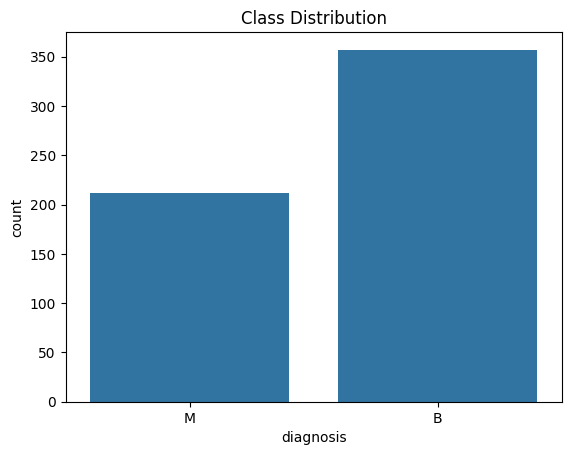

In [ ]:
sns.countplot(x=df['diagnosis'])
plt.title("Class Distribution")


About 62% benign vs 38% malignant --> **Moderate imbalance**;
In medical context, imbalance reflects real-world prevalence.

In [ ]:
duplicates = df.duplicated().sum()
print(f"Duplicate Rows: {duplicates}")

Duplicate Rows: 0


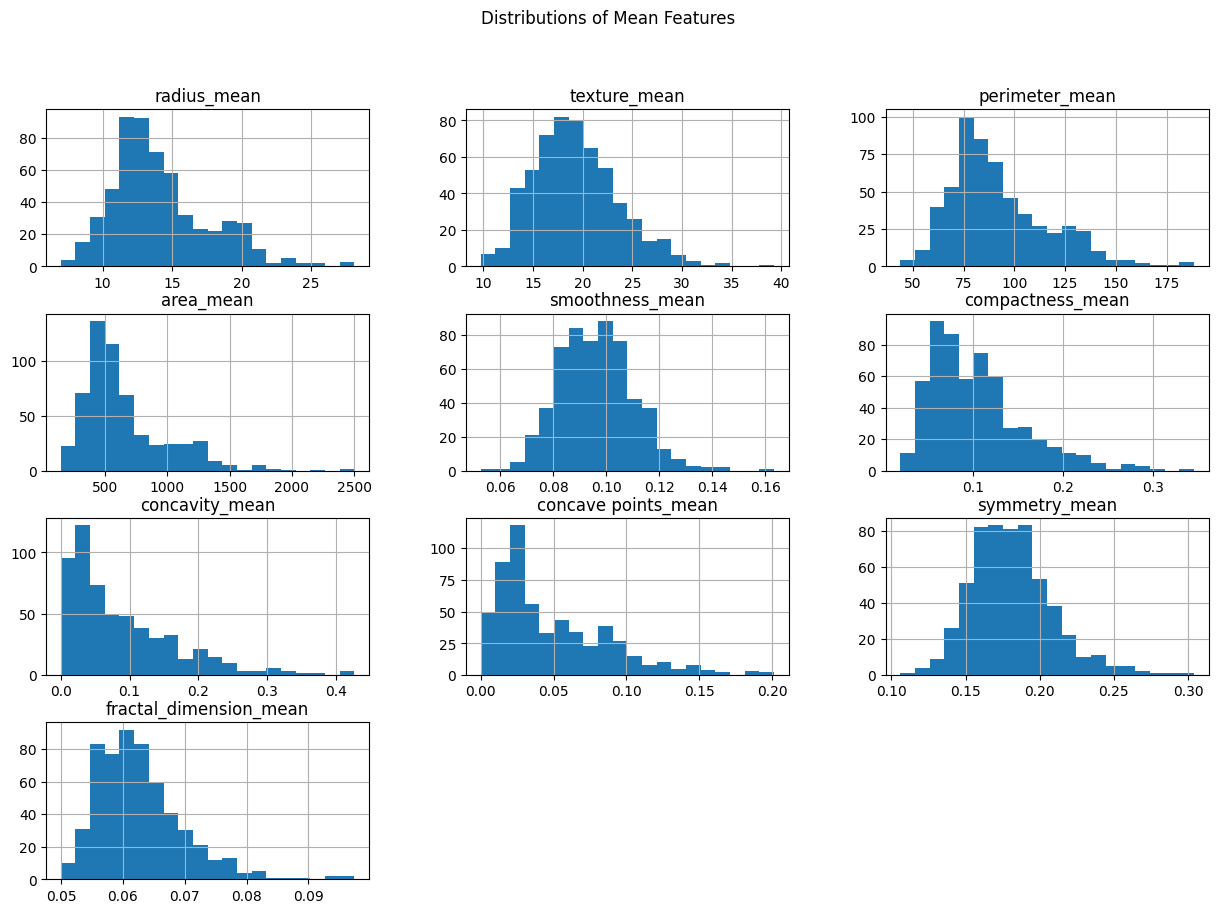

In [ ]:
# Select mean features for simplicity (10 core ones)
mean_features = [col for col in df.columns if '_mean' in col]

# Histograms
df[mean_features].hist(bins=20, figsize=(15, 10))
plt.suptitle('Distributions of Mean Features')
plt.show()



*   **Shape:**
    *   **Symmetric (Bell-shaped):** Indicates that data points are evenly distributed around the mean.

    *   **Skewed:** If a distribution is skewed,it means the data is concentrated on one side, with a tail extending to the other.
    *   **Bimodal/Multimodal:** If there are two or more peaks, it suggests distinct subgroups within the data.

*   **Central Tendency (Mean/Median):** The peak of the histogram gives an idea of the most frequent values.

*   **Spread (Variance/Standard Deviation):** The width of the histogram indicates the spread or variability of the data. A wider histogram means greater variability.

*   **Outliers:** Long tails or isolated bars far from the main distribution might indicate the presence of outliers.






**Interpretation of Mean Feature Distributions by Predictor Strength**


*   **Strong predictors (high skew, large malignant outliers):**
    *   `area_mean`
    *   `radius_mean`
    *   `perimeter_mean`
    *   `concavity_mean`
    *   `concave points_mean`
    *   `compactness_mean`
    


*   **Moderate predictors (normal-ish distribution, moderate spread):**
    *   `symmetry_mean`
    *   `texture_mean`
    


*   **Weak predictors (low spread, very narrow distributions):**
    *   `fractal_dimension_mean`
    *   `smoothness_mean`
    


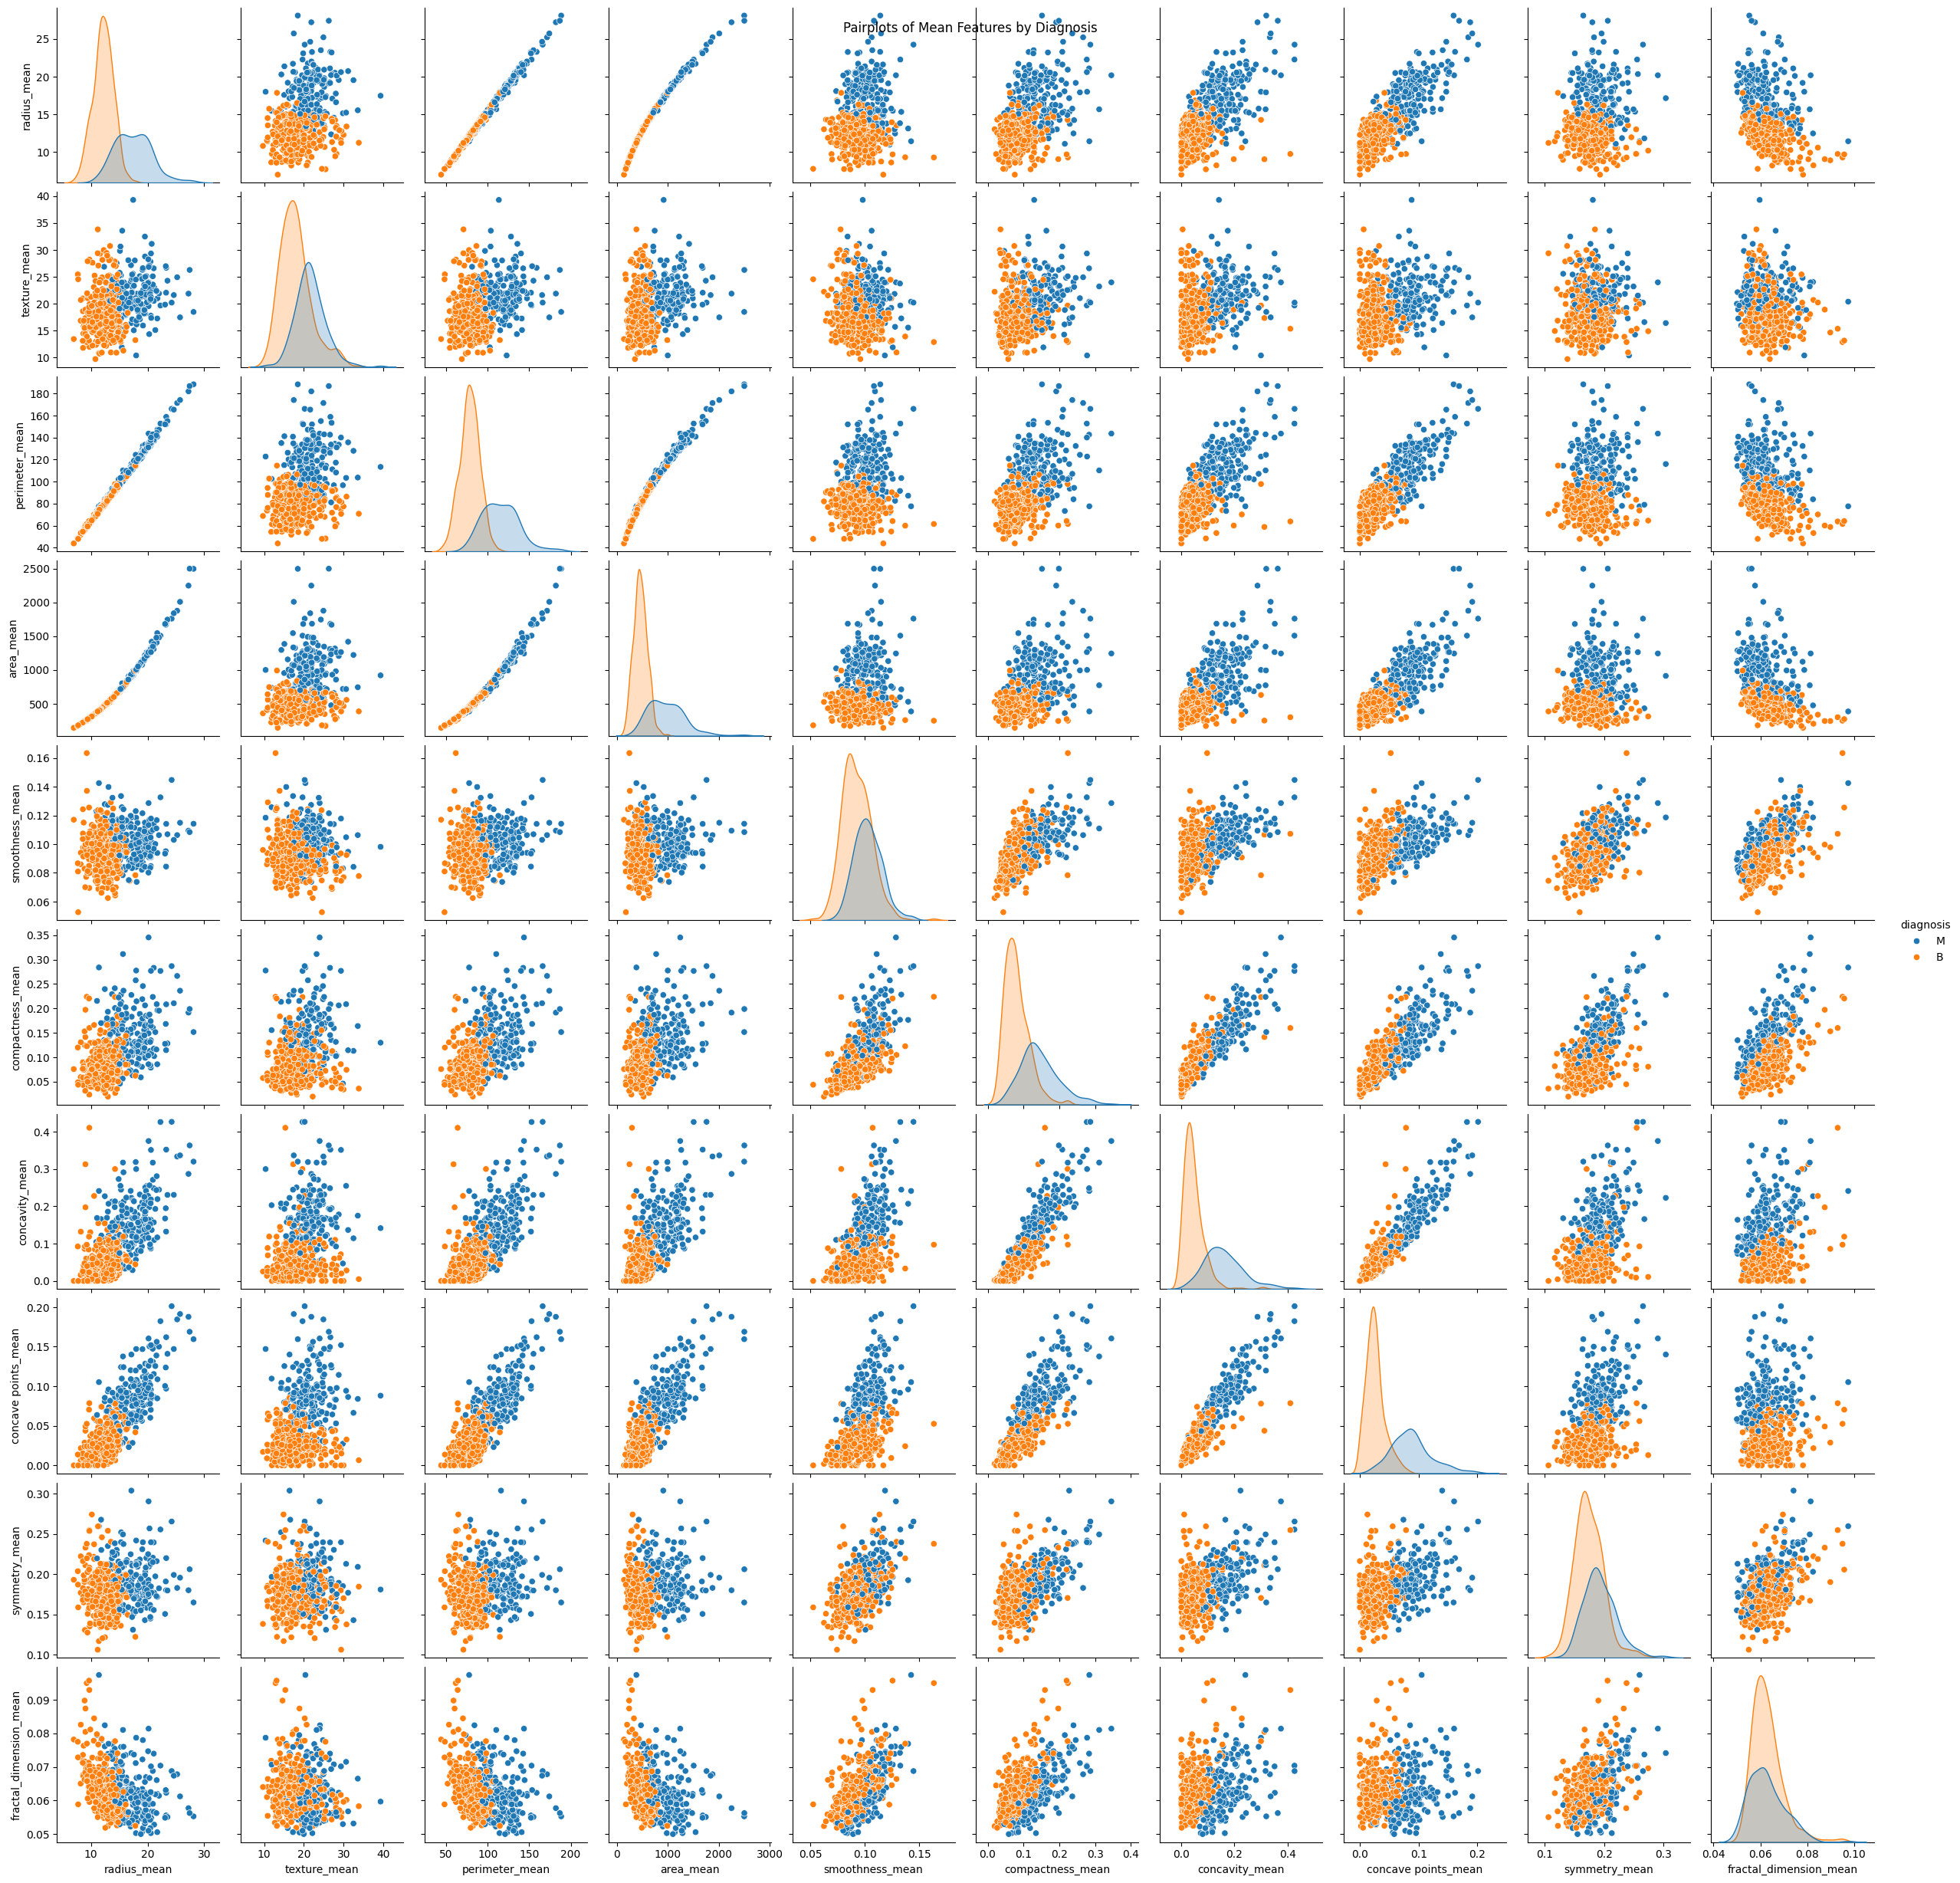

In [ ]:
# Pairplot on a subset to avoid overload (mean features + diagnosis)
sns.pairplot(df[mean_features + ['diagnosis']], hue='diagnosis', diag_kind='kde')
plt.suptitle('Pairplots of Mean Features by Diagnosis')
plt.show()

**Diagonal Plots → Distribution differences (single feature separation)**

On the diagonals,Kernel Density Estimate (KDE) curves for each feature split by class (`diagnosis`).

**What we observe:**

*   For `radius_mean`, `perimeter_mean`, `area_mean`, `concavity_mean`, `concave points_mean`, `compactness_mean`:
    *   The blue (Malignant) and orange (Benign) curves are clearly separated.
    *  **These features individually separate malignant from benign tumors very well.**

*   For `symmetry_mean` and `smoothness_mean`:
    *   The curves overlap more, meaning weaker individual discrimination.

*   For `fractal_dimension_mean`:
    *   The curves almost overlap → weakest individual predictor.


---> Size and irregularity features are strong markers of malignancy.Smoothness and fractal dimension are not.



**Off-Diagonal Plots → Scatter plots (pairwise interactions)**

**Strong linear patterns (highly correlated pairs)**

We see almost perfect linear relationship (blue + orange):

*   `radius_mean` vs `perimeter_mean`
*   `radius_mean` vs `area_mean`
*   `area_mean` vs `perimeter_mean`


--> These features are highly redundant and measure the same underlying concept:


*  **Nuclear size** This is why PCA (Principal Component Analysis) often compresses these features into a single component.

**Class separation in 2D**

Look at scatter plots:

*   Malignant (blue) cluster in the upper right corner.
*   Benign (orange) cluster in the lower left.

This appears especially clearly in:

*   `radius_mean` vs `area_mean`
*   `concavity_mean` vs `concave points_mean`
*   `perimeter_mean` vs `compactness_mean`

---> Malignant tumors have larger, more concave, more compact nuclei.Benign tumors have smaller, smoother, symmetric nuclei.




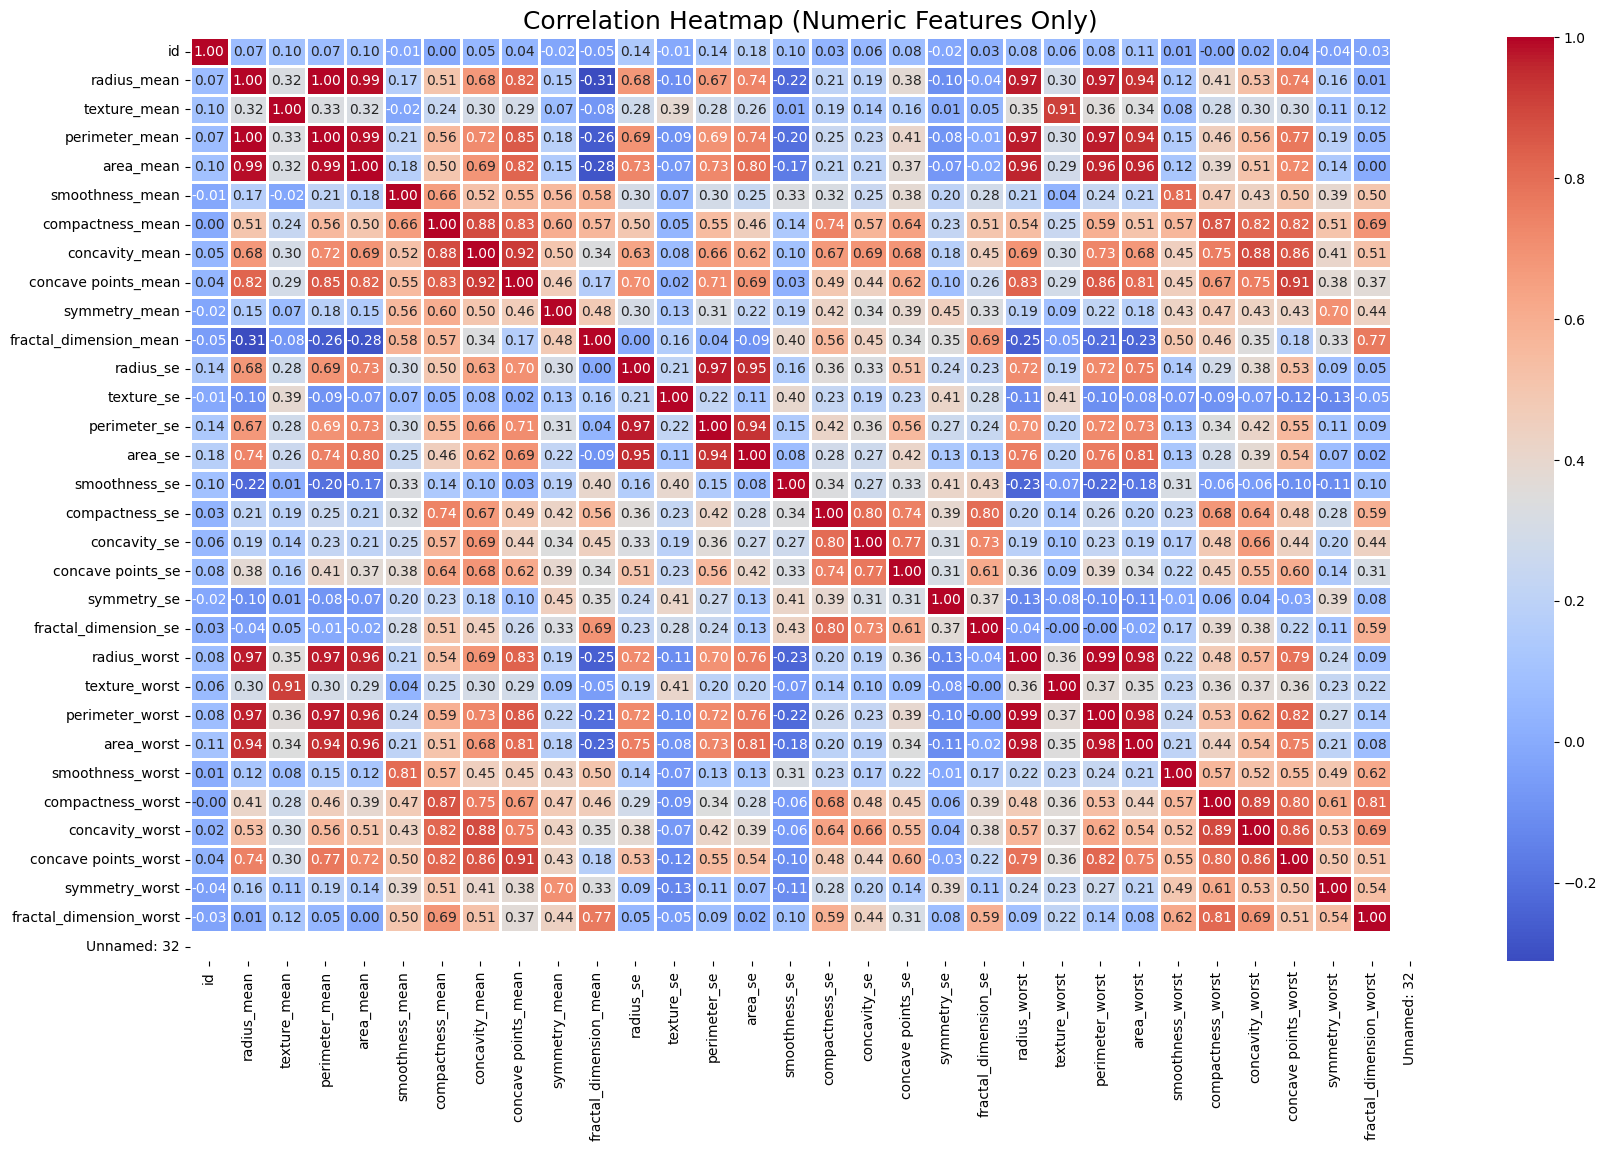

In [ ]:
plt.figure(figsize=(20, 12))

numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(
    corr,
    linewidths=1,
    annot=True,
    fmt=".2f",
    cmap="coolwarm"
)

plt.title("Correlation Heatmap (Numeric Features Only)", fontsize=18)
plt.show()



**Key Observations from *This* Heatmap:**

1.  **Strong Positive Correlations :**
    *   Size-related features:radius_mean, perimeter_mean, area_mean ,radius_worst, perimeter_worst, area_worst,radius_se, perimeter_se, area_se --> These features are basically measuring the same physical property: nuclear size(highly redundant).

    *  Irregularity features :compactness_mean, concavity_mean,concave points_mean,compactness_worst ,concavity_worst,concave points_worst

2.  **Low-Correlation Features:**

    *   fractal_dimension_mean, fractal_dimension_se, fractal_dimension_worst

2.  **Correlation with `diagnosis_num` (Target Variable):**
    *  Strong positive correlations with diagnosis_num:
        
        -concave points_worst (0.79)

        -radius_worst (0.77)

        -area_worst (0.76)

        -concavity_worst (0.73)

        -perimeter_worst (0.78)

        -compactness_worst (0.59)


---> **Multicollinearity is very high !**

Many predictors are so correlated they deliver the same information.

In [ ]:
# Outlier detection function (IQR)
def detect_outliers_iqr(feature_series):
    Q1 = feature_series.quantile(0.25)
    Q3 = feature_series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = feature_series[(feature_series < lower_bound) | (feature_series > upper_bound)]
    return len(outliers)

print("Outlier count per feature (IQR method):\n")

outlier_summary = {}

for feature in df.columns:
    # Skip non-numeric columns
    if not pd.api.types.is_numeric_dtype(df[feature]):
        print(f"{feature:20s}: SKIPPED (non-numeric)")
        continue

    outlier_count = detect_outliers_iqr(df[feature])
    outlier_percentage = (outlier_count / len(df)) * 100
    outlier_summary[feature] = outlier_count

    print(f"{feature:20s}: {outlier_count:3d} outliers ({outlier_percentage:5.2f}%)")

print("\nTotal numeric features processed:", len(outlier_summary))
print("Total outlier instances across all numeric features:", sum(outlier_summary.values()))


Outlier count per feature (IQR method):

id                  :  81 outliers (14.24%)
diagnosis           : SKIPPED (non-numeric)
radius_mean         :  14 outliers ( 2.46%)
texture_mean        :   7 outliers ( 1.23%)
perimeter_mean      :  13 outliers ( 2.28%)
area_mean           :  25 outliers ( 4.39%)
smoothness_mean     :   6 outliers ( 1.05%)
compactness_mean    :  16 outliers ( 2.81%)
concavity_mean      :  18 outliers ( 3.16%)
concave points_mean :  10 outliers ( 1.76%)
symmetry_mean       :  15 outliers ( 2.64%)
fractal_dimension_mean:  15 outliers ( 2.64%)
radius_se           :  38 outliers ( 6.68%)
texture_se          :  20 outliers ( 3.51%)
perimeter_se        :  38 outliers ( 6.68%)
area_se             :  65 outliers (11.42%)
smoothness_se       :  30 outliers ( 5.27%)
compactness_se      :  28 outliers ( 4.92%)
concavity_se        :  22 outliers ( 3.87%)
concave points_se   :  19 outliers ( 3.34%)
symmetry_se         :  27 outliers ( 4.75%)
fractal_dimension_se:  28 outlier

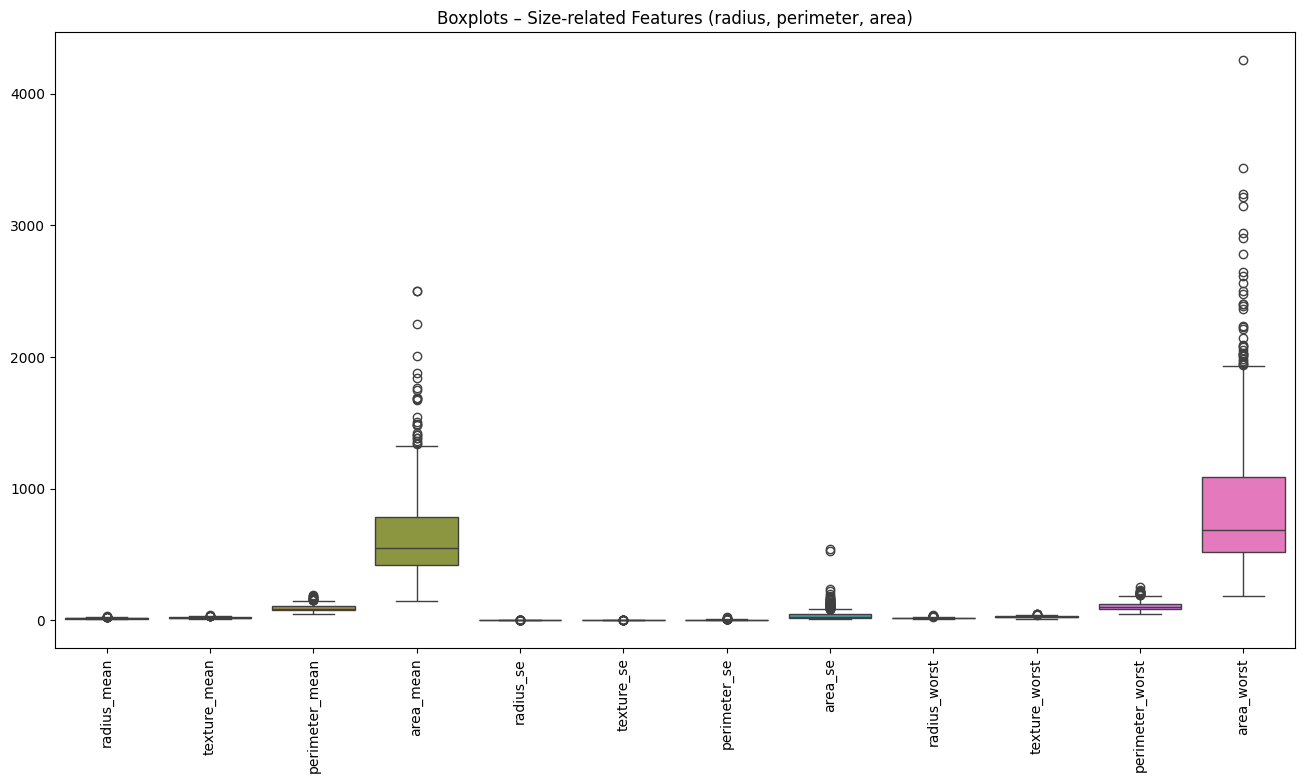

In [ ]:
size_features = [
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
    'radius_se', 'texture_se', 'perimeter_se', 'area_se',
    'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst'
]

plt.figure(figsize=(16, 8))
sns.boxplot(data=df[size_features])
plt.xticks(rotation=90)
plt.title("Boxplots – Size-related Features (radius, perimeter, area)")
plt.show()


-Size features (radius, perimeter, area) show the largest ranges

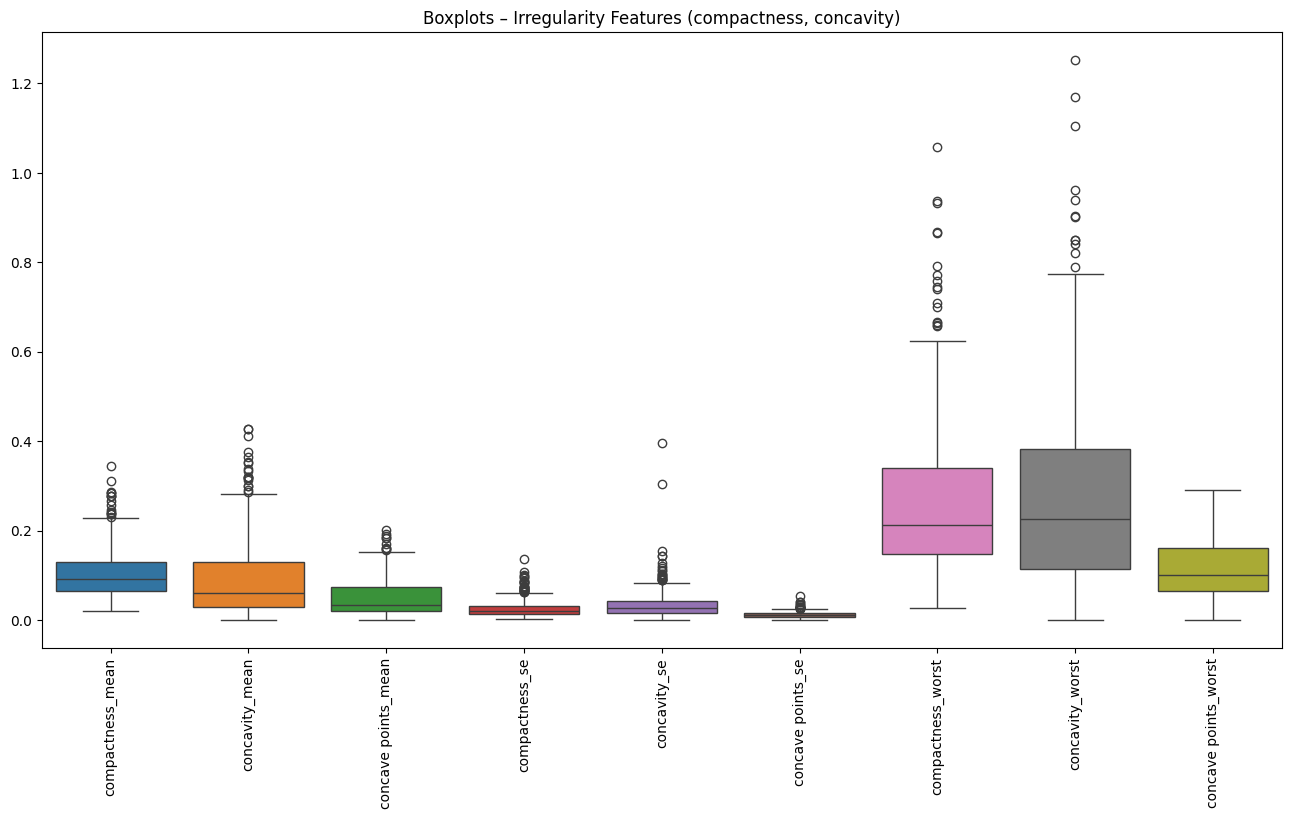

In [ ]:
irregularity_features = [
    'compactness_mean', 'concavity_mean', 'concave points_mean',
    'compactness_se', 'concavity_se', 'concave points_se',
    'compactness_worst', 'concavity_worst', 'concave points_worst'
]

plt.figure(figsize=(16, 8))
sns.boxplot(data=df[irregularity_features])
plt.xticks(rotation=90)
plt.title("Boxplots – Irregularity Features (compactness, concavity)")
plt.show()


-Irregularity featuresdisplay significant outlier behavior.

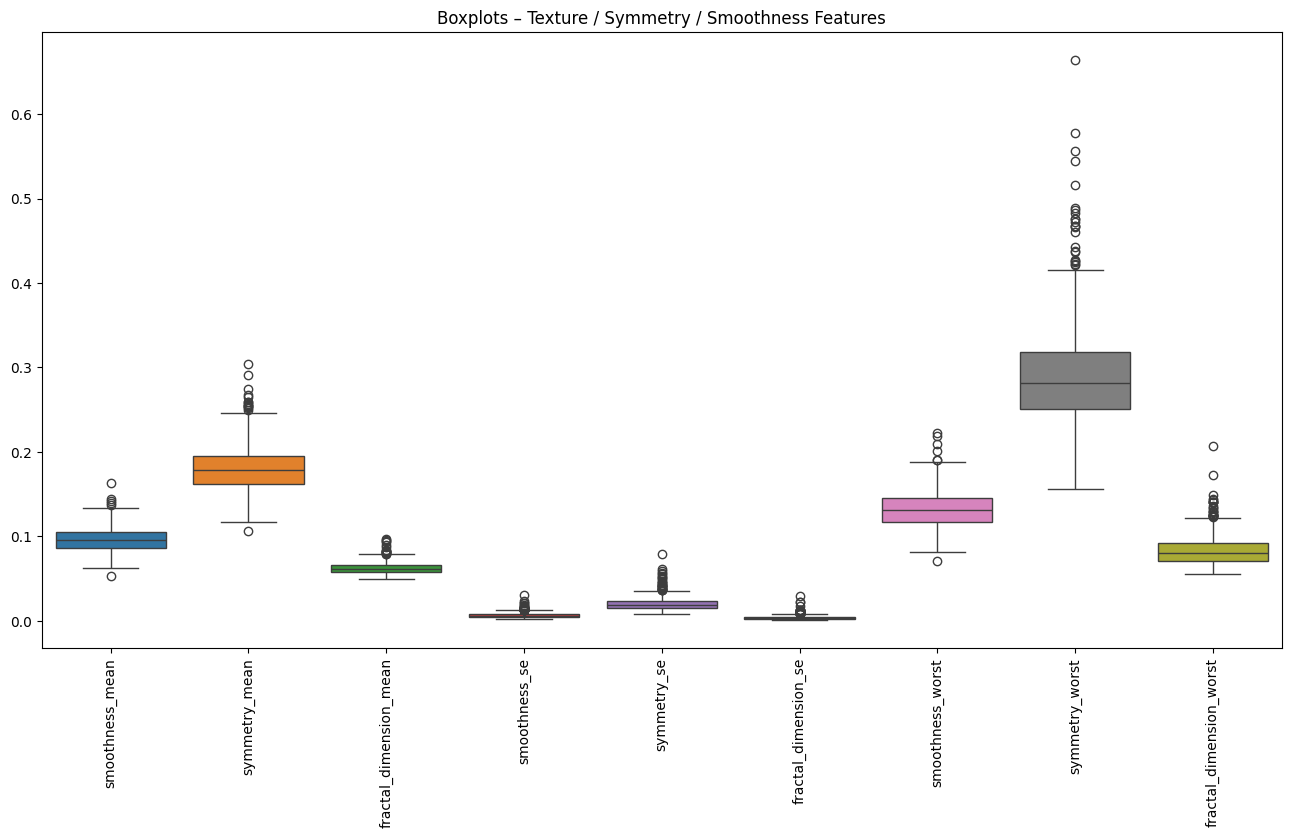

In [ ]:
texture_features = [
    'smoothness_mean', 'symmetry_mean', 'fractal_dimension_mean',
    'smoothness_se', 'symmetry_se', 'fractal_dimension_se',
    'smoothness_worst', 'symmetry_worst', 'fractal_dimension_worst'
]

plt.figure(figsize=(16, 8))
sns.boxplot(data=df[texture_features])
plt.xticks(rotation=90)
plt.title("Boxplots – Texture / Symmetry / Smoothness Features")
plt.show()


**Principal Component Analysis (PCA)**

To better understand the structure of the dataset and the relationships between features,  
**Principal Component Analysis (PCA)** was applied as part of the Data Understanding phase

PCA is a dimensionality reduction technique that transforms the original features into a new set of
uncorrelated variables called **principal components (PCs)**. These components capture the maximum
amount of variance present in the dataset.

In [ ]:
from sklearn.preprocessing import StandardScaler
df_copy = df.drop(["id", "Unnamed: 32"], axis=1, errors="ignore")
# Extract features
X = df_copy.drop("diagnosis", axis=1)
feature_names = X.columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=feature_names)

print("Data scaled → mean ≈ 0, std ≈ 1")
print("Scaled shape:", X_scaled.shape)

Data scaled → mean ≈ 0, std ≈ 1
Scaled shape: (569, 30)


Explained Variance Ratio:
[4.42720256e-01 1.89711820e-01 9.39316326e-02 6.60213492e-02
 5.49576849e-02 4.02452204e-02 2.25073371e-02 1.58872380e-02
 1.38964937e-02 1.16897819e-02 9.79718988e-03 8.70537901e-03
 8.04524987e-03 5.23365745e-03 3.13783217e-03 2.66209337e-03
 1.97996793e-03 1.75395945e-03 1.64925306e-03 1.03864675e-03
 9.99096464e-04 9.14646751e-04 8.11361259e-04 6.01833567e-04
 5.16042379e-04 2.72587995e-04 2.30015463e-04 5.29779290e-05
 2.49601032e-05 4.43482743e-06]

Cumulative Explained Variance:
[0.44272026 0.63243208 0.72636371 0.79238506 0.84734274 0.88758796
 0.9100953  0.92598254 0.93987903 0.95156881 0.961366   0.97007138
 0.97811663 0.98335029 0.98648812 0.98915022 0.99113018 0.99288414
 0.9945334  0.99557204 0.99657114 0.99748579 0.99829715 0.99889898
 0.99941502 0.99968761 0.99991763 0.99997061 0.99999557 1.        ]


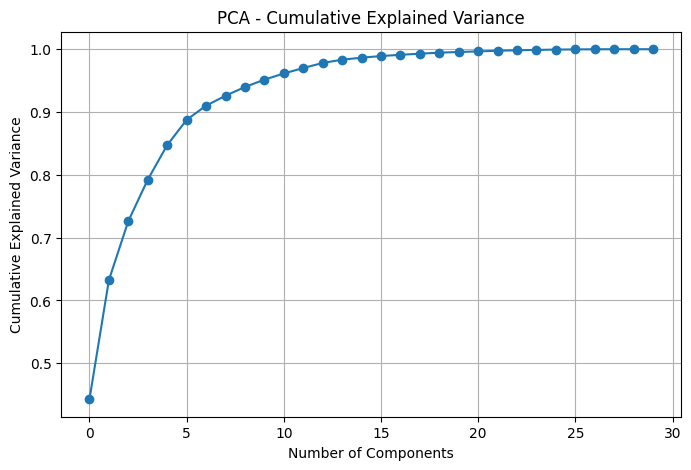

In [ ]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

pca = PCA()
pca.fit(X_scaled)

explained_var = pca.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var)

print("Explained Variance Ratio:")
print(explained_var)

print("\nCumulative Explained Variance:")
print(cumulative_var)

# --- Plot cumulative explained variance ---
plt.figure(figsize=(8,5))
plt.plot(cumulative_var, marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA - Cumulative Explained Variance")
plt.grid(True)
plt.show()


The plot shows how much of the dataset’s information is captured by the principal components.

- **PC1 and PC2 already capture most of the important variance.**
- The curve rises quickly, meaning the dataset has many correlated features.
- Around **5–10 components** capture almost all useful information.
- After that, adding more components does not add much value.

This means the dataset’s structure can be well understood using only a few principal components.


In [ ]:
!pip install adjustText

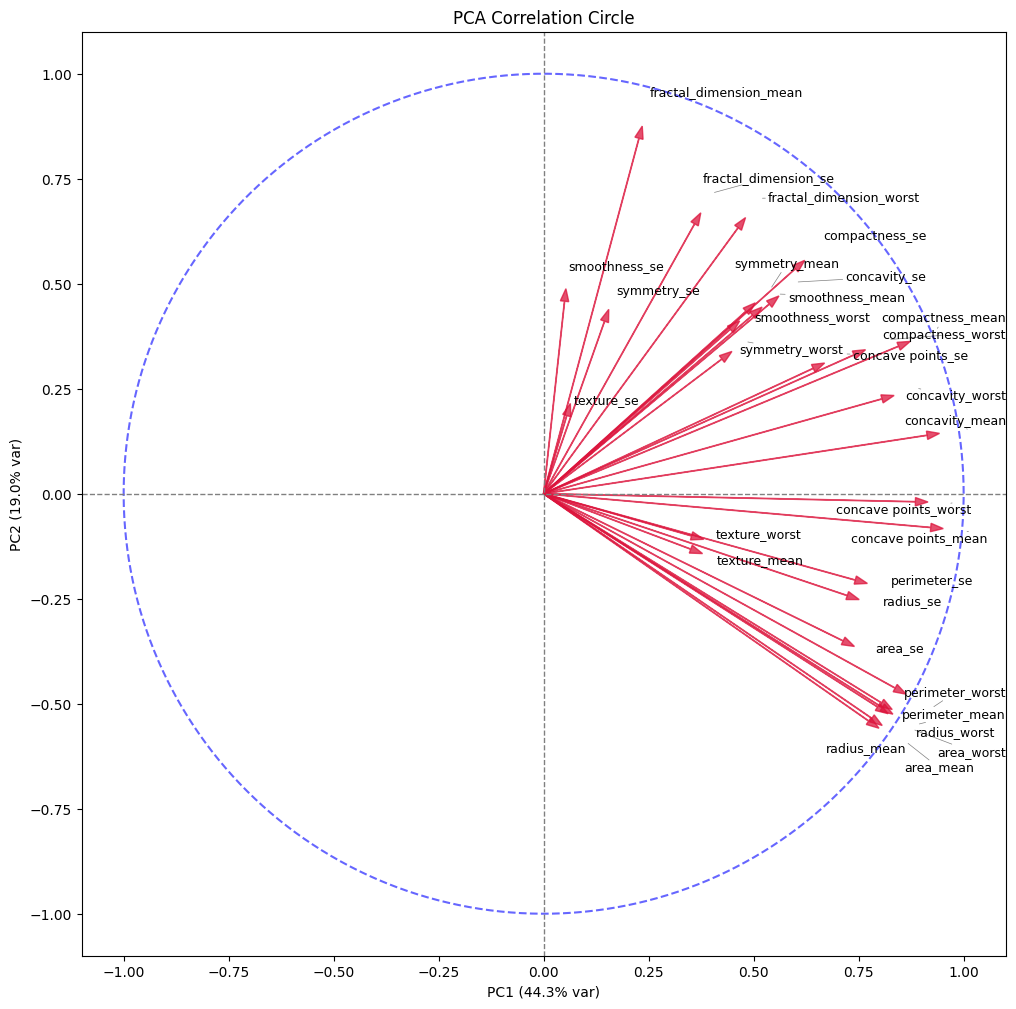

In [ ]:
from adjustText import adjust_text
import matplotlib.pyplot as plt
import numpy as np

eigvals = pca.explained_variance_

# Correlation circle coordinates
loadings_corr = pca.components_.T * np.sqrt(eigvals)

# Plot
fig, ax = plt.subplots(figsize=(12, 12))

# Unit circle
theta = np.linspace(0, 2*np.pi, 500)
ax.plot(np.cos(theta), np.sin(theta), 'b--', alpha=0.6)

names = X.columns
texts = []

# Draw arrows and labels
for i, name in enumerate(names):
    x, y = loadings_corr[i, 0], loadings_corr[i, 1]

    ax.arrow(0, 0, x, y,
             color='crimson',
             alpha=0.75,
             head_width=0.02,
             length_includes_head=True)

    texts.append(ax.text(x*1.07, y*1.07, name, fontsize=9))

# Adjust labels
adjust_text(texts, arrowprops=dict(arrowstyle="-", lw=0.5, color="gray"))

# Add axes & labels
ax.axhline(0, color='grey', lw=1, ls='--')
ax.axvline(0, color='grey', lw=1, ls='--')

ax.set_xlabel(f"PC1 ({explained_var[0]*100:.1f}% var)")
ax.set_ylabel(f"PC2 ({explained_var[1]*100:.1f}% var)")
ax.set_title("PCA Correlation Circle")
ax.set_aspect('equal', 'box')

plt.show()


The PCA correlation circle shows how each original feature contributes to the first two principal components (PC1 and PC2).

### 1. Features strongly linked to PC1
Many features related to **size and shape of the nucleus** (radius, area, perimeter, concavity, compactness) point in the same direction.  
This means they are **highly correlated** and describe the same underlying concept: **larger and more irregular nuclei**.

These features have long arrows, meaning they contribute strongly to PC1, which explains **44.3% of the variance**.

### 2. Features linked to PC2
PC2 (19% variance) is influenced mainly by:
- **fractal_dimension_mean/se/worst**
- some **texture** and **smoothness** measures

These arrows point more vertically, meaning PC2 captures variation related to **texture complexity** rather than size.

### 3. Grouping and angle interpretation
- Features pointing in **similar directions** are positively correlated.  
- Features pointing in **opposite directions** are negatively correlated.  
- Features with **short arrows** contribute weakly to PC1 and PC2 (less important in this 2D view).

---

- **PC1 captures tumor size and irregularity** (dominant pattern in the dataset).  
- **PC2 captures texture and boundary complexity**.  
- Many features are redundant, which explains why PCA can represent the dataset well with only a few components.

The correlation circle confirms that the dataset has strong internal structure and highly correlated feature groups.


**Compute cos²**

cos² helps evaluate **how much trust** we can place in a feature's position in the PCA visualization and which features are **most influential** in shaping the principal components.

In [ ]:
# Loadings matrix
loadings = pca.components_.T   # (n_features, n_components)

# Square of loadings
loadings_sq = loadings**2

# Total squared loadings per variable (row-wise sum)
loadings_sq_sum = loadings_sq.sum(axis=1).reshape(-1, 1)

# cos² matrix
cos2 = loadings_sq / loadings_sq_sum

# Convert to DataFrame (optional but nicer)
cos2_df = pd.DataFrame(cos2, index=X.columns,
                       columns=[f"PC{i+1}" for i in range(cos2.shape[1])])

print("Cos² (quality of representation):")
cos2_df.head()

Cos² (quality of representation):


PC1       PC2       PC3       PC4       PC5       PC6  \
radius_mean      0.047918  0.054689  0.000073  0.001715  0.001428  0.000351   
texture_mean     0.010759  0.003565  0.004167  0.363669  0.002447  0.001035   
perimeter_mean   0.051773  0.046303  0.000087  0.001763  0.001397  0.000300   
area_mean        0.048839  0.053396  0.000824  0.002855  0.000107  0.000004   
smoothness_mean  0.020332  0.034638  0.010877  0.025403  0.133290  0.082010   

                      PC7       PC8       PC9      PC10  ...      PC21  \
radius_mean      0.015398  0.000056  0.049778  0.009118  ...  0.004702   
texture_mean     0.000130  0.017076  0.012701  0.058049  ...  0.201035   
perimeter_mean   0.013105  0.000349  0.050059  0.007462  ...  0.004868   
area_mean        0.002668  0.001202  0.038254  0.005618  ...  0.000340   
smoothness_mean  0.019788  0.083506  0.000041  0.004801  ...  0.014278   

                     PC22          PC23      PC24      PC25      PC26  \
radius_mean      0.005319  9.712634e-03  0.033335  0.000370  0.016764   
texture_mean     0.008987  3.080222e-07  0.009759  0.007182  0.000603   
perimeter_mean   0.005649  1.619636e-03  0.013607  0.000730  0.015689   
area_mean        0.009519  6.048598e-05  0.004879  0.044117  0.131571   
smoothness_mean  0.004073  4.270720e-04  0.004719  0.000838  0.001369   

                     PC27          PC28      PC29          PC30  
radius_mean      0.017299  4.460291e-02  0.044716  4.933856e-01  
texture_mean     0.000301  4.331148e-09  0.000111  7.489035e-08  
perimeter_mean   0.013321  7.112943e-03  0.147322  4.759578e-01  
area_mean        0.217727  7.426079e-02  0.178756  1.085528e-03  
smoothness_mean  0.004857  2.188236e-06  0.000012  2.349785e-05  

[5 rows x 30 columns]

In [ ]:
cos2_df[['PC1', 'PC2']].sort_values(by="PC1", ascending=False)

PC1       PC2
concave points_mean      0.068045  0.001209
concavity_mean           0.066771  0.003620
concave points_worst     0.062944  0.000068
compactness_mean         0.057257  0.023071
perimeter_worst          0.055998  0.039951
concavity_worst          0.052335  0.009597
radius_worst             0.051982  0.048341
perimeter_mean           0.051773  0.046303
area_worst               0.050567  0.048115
area_mean                0.048839  0.053396
radius_mean              0.047918  0.054689
perimeter_se             0.044659  0.008003
compactness_worst        0.044140  0.020619
radius_se                0.042427  0.011141
area_se                  0.041156  0.023193
concave points_se        0.033642  0.016984
compactness_se           0.029034  0.054157
concavity_se             0.023590  0.038891
smoothness_mean          0.020332  0.034638
symmetry_mean            0.019090  0.036233
fractal_dimension_worst  0.017367  0.075812
smoothness_worst         0.016372  0.029689
symmetry_worst           0.015106  0.020131
texture_worst            0.010914  0.002067
texture_mean             0.010759  0.003565
fractal_dimension_se     0.010520  0.078452
fractal_dimension_mean   0.004143  0.134378
symmetry_se              0.001806  0.033800
texture_se               0.000304  0.008096
smoothness_se            0.000211  0.041792

In [ ]:
# Color intensity based on cos² for PC1+PC2
variable_cos2 = cos2_df.loc[name, "PC1"] + cos2_df.loc[name, "PC2"]
ax.arrow(0, 0, x, y,
         color=plt.cm.viridis(variable_cos2),
         alpha=0.9,
         head_width=0.02,
         length_includes_head=True)


**Top 10 Most Important Features**

Top 10 Most Important Features:
                 feature  importance
22       perimeter_worst    0.136217
23            area_worst    0.127233
27  concave points_worst    0.125511
7    concave points_mean    0.098487
20          radius_worst    0.087023
6         concavity_mean    0.051233
3              area_mean    0.047854
2         perimeter_mean    0.047454
0            radius_mean    0.044267
13               area_se    0.035118


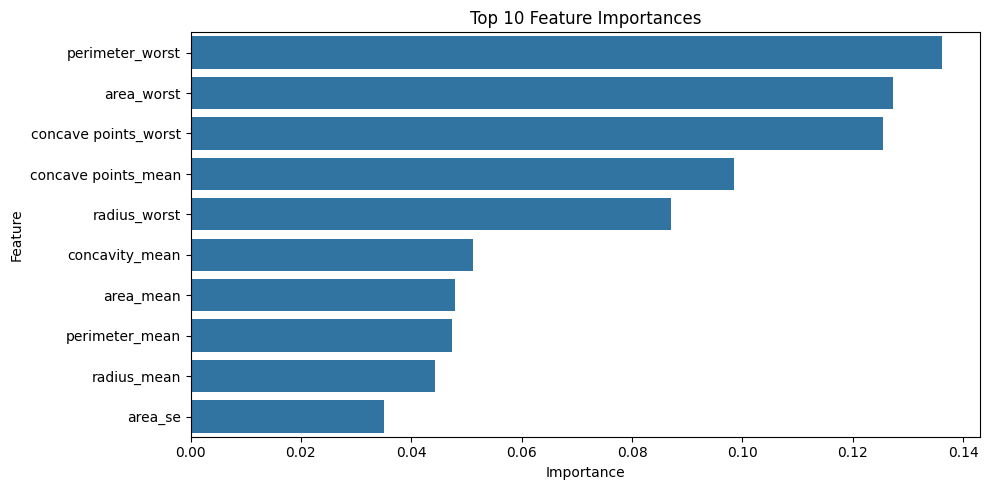

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

y = df_copy["diagnosis"]

le = LabelEncoder()
y_encoded = le.fit_transform(y)

rf = RandomForestClassifier(n_estimators=500, random_state=42)
rf.fit(X, y_encoded)

importances = pd.DataFrame({
    "feature": X.columns,
    "importance": rf.feature_importances_
})

top10 = importances.sort_values(by="importance", ascending=False).head(10)
print("Top 10 Most Important Features:")
print(top10)

plt.figure(figsize=(10,5))
sns.barplot(data=top10, x="importance", y="feature")
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


Random Forest was used to identify the most important features contributing to the classification of breast tumors.  
The plot highlights the **top 10 features** ranked by their importance scores.

### **1. “Worst” measurements dominate importance**
Features such as **perimeter_worst**, **area_worst**, **concave points_worst**, and **radius_worst** have the highest importance scores.  
These describe the **most severe (largest or most irregular) measurements** of the nucleus and are strong indicators of malignancy.

### **2. Shape irregularity features are highly influential**
- **concave points_mean**
- **concavity_mean**

These features capture how irregular or sharp the nucleus edges are — a known characteristic of malignant tumors.

### **3. Size-related features remain crucial**
- **area_mean**
- **perimeter_mean**
- **radius_mean**

These show that **tumor size characteristics** are still relevant predictors, although less influential than the “worst” values.



##II.2. Dataset 2: DSO2 + DSO3


In [ ]:
path = "/content/drive/MyDrive/Dataset_ML/dataR2.csv"
df2 = pd.read_csv(path)

In [ ]:
df2.head()

Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  Resistin  \
0   48  23.500000       70    2.707  0.467409   8.8071     9.702400   7.99585   
1   83  20.690495       92    3.115  0.706897   8.8438     5.429285   4.06405   
2   82  23.124670       91    4.498  1.009651  17.9393    22.432040   9.27715   
3   68  21.367521       77    3.226  0.612725   9.8827     7.169560  12.76600   
4   86  21.111111       92    3.549  0.805386   6.6994     4.819240  10.57635   

     MCP.1  Classification  
0  417.114               1  
1  468.786               1  
2  554.697               1  
3  928.220               1  
4  773.920               1

In [ ]:
print(f"Dataset Shape: {df2.shape}")
print(f"Number of instances: {df2.shape[0]}")
print(f"Number of features: {df.shape[1]}")


Dataset Shape: (116, 10)
Number of instances: 116
Number of features: 33


In [ ]:
df2.dtypes

Age                 int64
BMI               float64
Glucose             int64
Insulin           float64
HOMA              float64
Leptin            float64
Adiponectin       float64
Resistin          float64
MCP.1             float64
Classification      int64
dtype: object

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


In [ ]:
df2.describe()

Age         BMI     Glucose     Insulin        HOMA      Leptin  \
count  116.000000  116.000000  116.000000  116.000000  116.000000  116.000000   
mean    57.301724   27.582111   97.793103   10.012086    2.694988   26.615080   
std     16.112766    5.020136   22.525162   10.067768    3.642043   19.183294   
min     24.000000   18.370000   60.000000    2.432000    0.467409    4.311000   
25%     45.000000   22.973205   85.750000    4.359250    0.917966   12.313675   
50%     56.000000   27.662416   92.000000    5.924500    1.380939   20.271000   
75%     71.000000   31.241442  102.000000   11.189250    2.857787   37.378300   
max     89.000000   38.578759  201.000000   58.460000   25.050342   90.280000   

       Adiponectin    Resistin        MCP.1  Classification  
count   116.000000  116.000000   116.000000      116.000000  
mean     10.180874   14.725966   534.647000        1.551724  
std       6.843341   12.390646   345.912663        0.499475  
min       1.656020    3.210000    45.843000        1.000000  
25%       5.474283    6.881763   269.978250        1.000000  
50%       8.352692   10.827740   471.322500        2.000000  
75%      11.815970   17.755207   700.085000        2.000000  
max      38.040000   82.100000  1698.440000        2.000000

In this step, we calculate how many missing (null) values exist in each column of the dataset. This information is important because columns with many missing values may need special handling, such as imputation or removal, to ensure the quality of our analysis and models.

In [ ]:
info_df2 = pd.DataFrame({
        'Column': df2.columns,
        'Non_Null_Count': df2.count(),
        'Null_Count': df2.isnull().sum(),
        'Missing_%': (df2.isnull().sum() / len(df2) * 100).round(2)
    })
print(info_df2.to_string(index=False))


        Column  Non_Null_Count  Null_Count  Missing_%
           Age             116           0        0.0
           BMI             116           0        0.0
       Glucose             116           0        0.0
       Insulin             116           0        0.0
          HOMA             116           0        0.0
        Leptin             116           0        0.0
   Adiponectin             116           0        0.0
      Resistin             116           0        0.0
         MCP.1             116           0        0.0
Classification             116           0        0.0


## II.2.1 Missing Values Analysis

In this step, we calculate how many missing (null) values exist in each column of the dataset. This information is important because columns with many missing values may need special handling, such as imputation or removal, to ensure the quality of our analysis and models.

In [ ]:
info_df2 = pd.DataFrame({
        'Column': df2.columns,
        'Non_Null_Count': df2.count(),
        'Null_Count': df2.isnull().sum(),
        'Missing_%': (df2.isnull().sum() / len(df2) * 100).round(2)
    })
print(info_df2.to_string(index=False))


        Column  Non_Null_Count  Null_Count  Missing_%
           Age             116           0        0.0
           BMI             116           0        0.0
       Glucose             116           0        0.0
       Insulin             116           0        0.0
          HOMA             116           0        0.0
        Leptin             116           0        0.0
   Adiponectin             116           0        0.0
      Resistin             116           0        0.0
         MCP.1             116           0        0.0
Classification             116           0        0.0


## II.2.2 Duplicate Analysis

In this step, we check the dataset for duplicate rows. Duplicate records can skew analysis and models by overrepresenting certain data points.

In [ ]:
duplicate_count = df2.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_count}")
if duplicate_count > 0:
    print(f"Percentage: {(duplicate_count/len(df2)*100):.2f}%")
print()


Number of duplicate rows: 0



## II.2.3 Data Visualization

Boxplots are used to visualize the distribution of numerical data and detect outliers. They display the median, quartiles, and potential extreme values for each feature, helping us understand variability and spot anomalies that may need further investigation or treatment.

#### Create boxplots for numerical columns

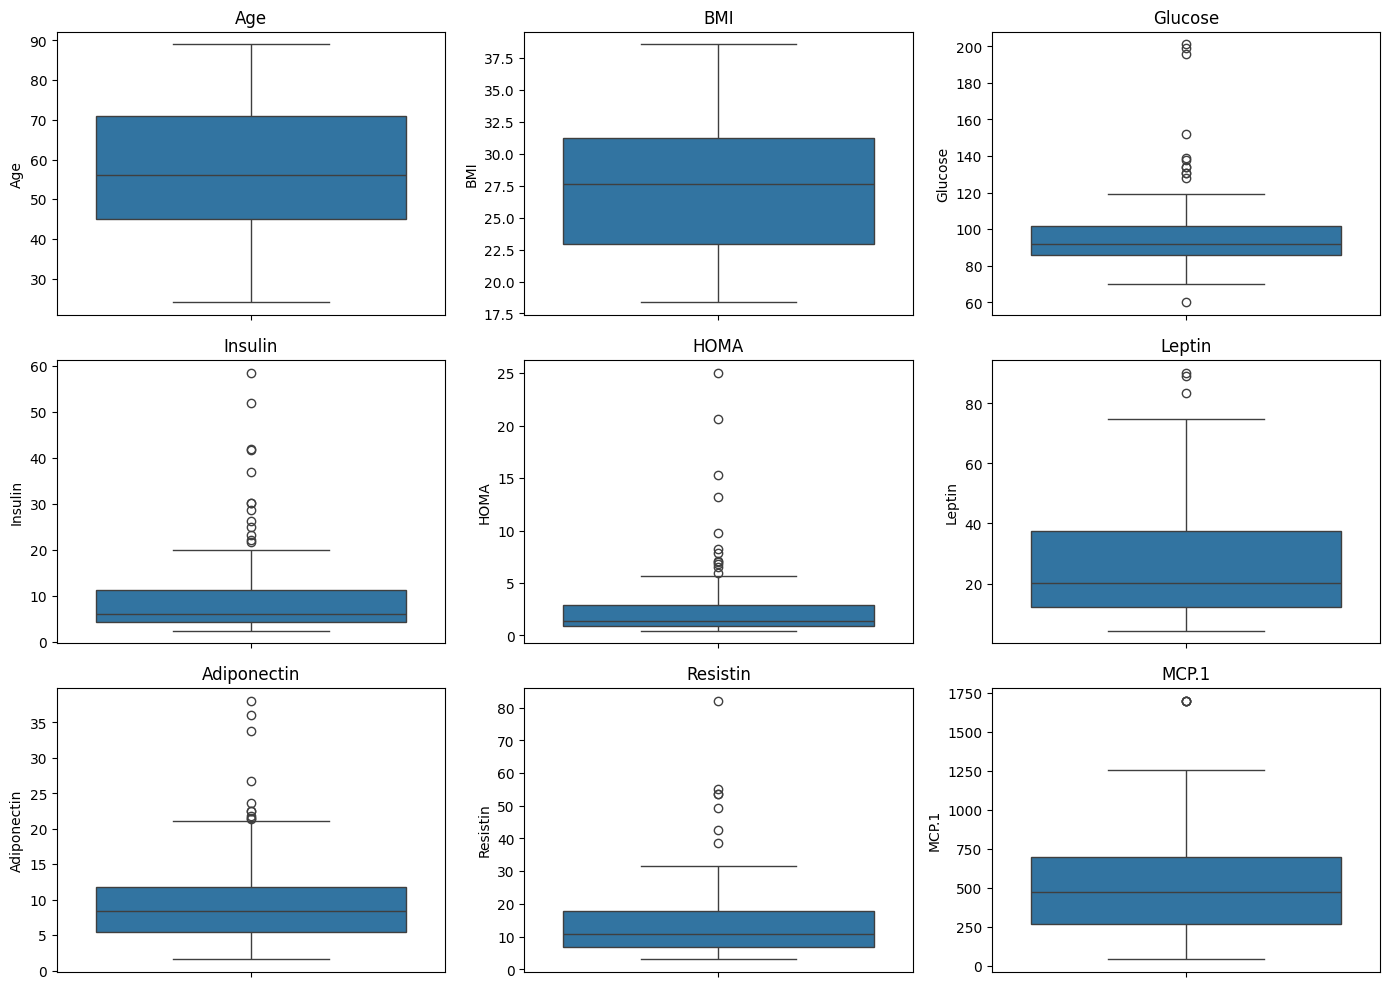

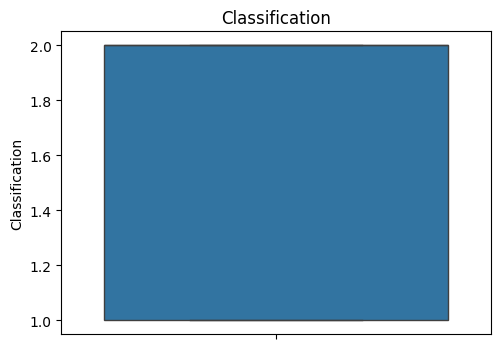

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

numerical_cols = df2.select_dtypes(include=['int64', 'float64']).columns

numerical_cols = [col for col in numerical_cols if df2[col].dropna().shape[0] > 0]
cols_per_fig = 9  # number of boxplots per figure

for start in range(0, len(numerical_cols), cols_per_fig):
    end = start + cols_per_fig
    batch = numerical_cols[start:end]

    plt.figure(figsize=(14, 10))
    for i, col in enumerate(batch, 1):
        plt.subplot(3, 3, i)  # 2 rows, 3 columns
        sns.boxplot(y=df2[col])
        plt.title(col)

    plt.tight_layout()
    plt.show()


This dataset was built for research purposes → the outliers are not errors; they are anomalies related to the disease.

Correlation Visualization:

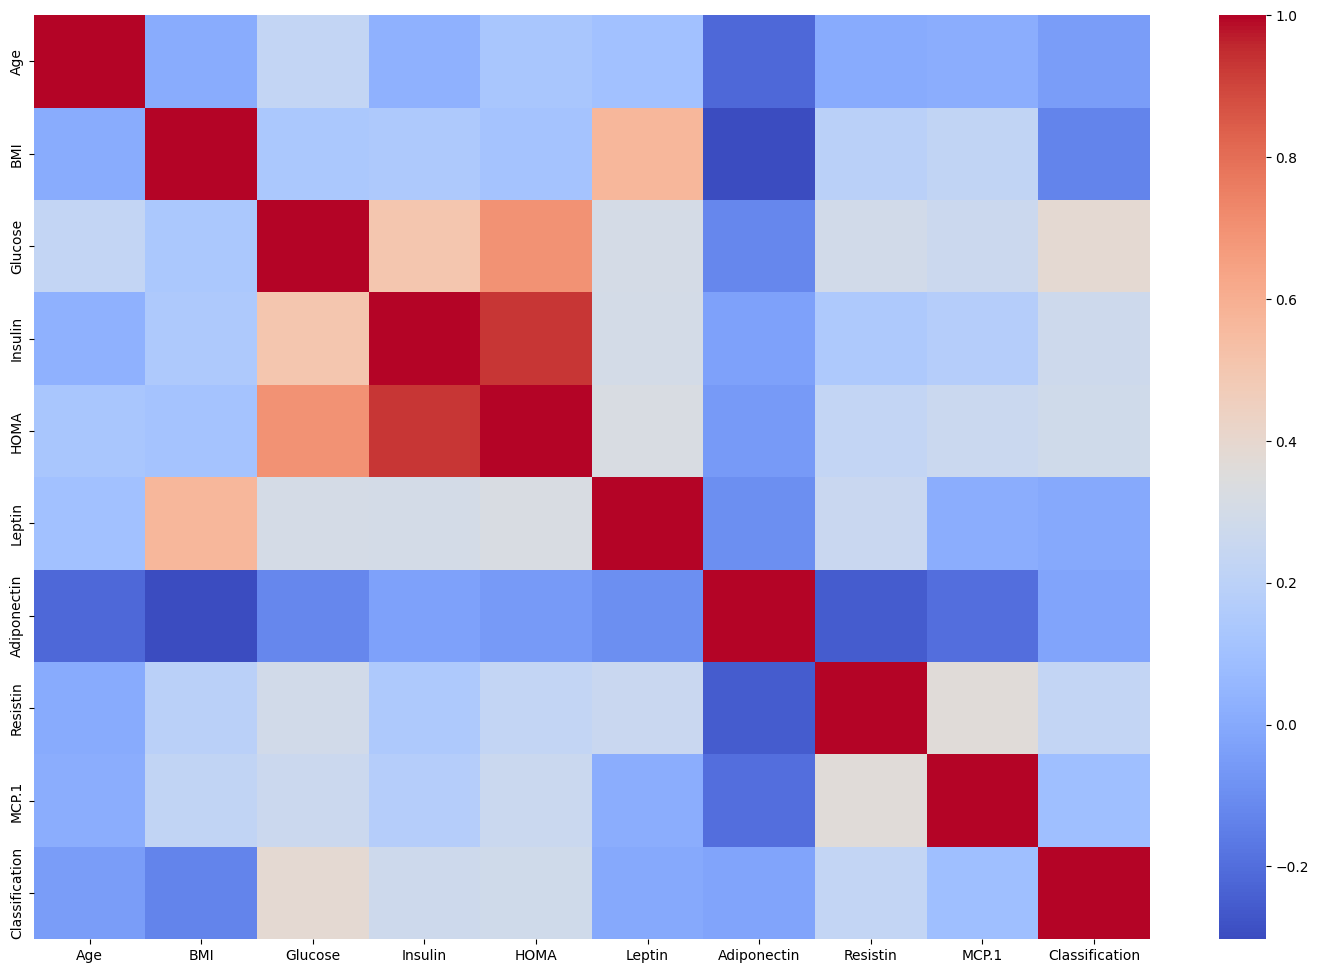

In [ ]:
# matrice de correllation les variables entre eux
df_features2 = df2.drop(columns=['Classification'])
plt.figure(figsize=(18, 12))
sns.heatmap(df2.corr(), annot=False, cmap='coolwarm')
plt.show()


**High Positive Correlation (Red)**: The disease risk variables Insulin, HOMA, Glucose, Leptin, BMI, Resistin, and MCP.1 are all strongly positively correlated with each other and with the final Classification.

**High Negative Correlation (Blue)**: Adiponectin is strongly negatively correlated with Insulin, HOMA, Glucose, and Classification, positioning it opposite the disease indicators.

**Low Correlation (Pale)**: Age shows weak correlation with most other variables.

In [ ]:
# matrice de correllation les variables avec la target
# creation de diagnosis numerique

df2.corr()['Classification'].sort_values(ascending=False)



Classification    1.000000
Glucose           0.384315
HOMA              0.284012
Insulin           0.276804
Resistin          0.227310
MCP.1             0.091381
Leptin           -0.001078
Adiponectin      -0.019490
Age              -0.043555
BMI              -0.132586
Name: Classification, dtype: float64

### Principal Component Analysis (PCA)

In [ ]:
# standardisation
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Sélectionner uniquement les variables numériques
X = df2.select_dtypes(include=[np.number])

# --- 2. Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- 3. PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

# Variance expliquée
print("Variance expliquée par PC1 et PC2 :", pca.explained_variance_ratio_)


Variance expliquée par PC1 et PC2 : [0.3169621  0.16237842]


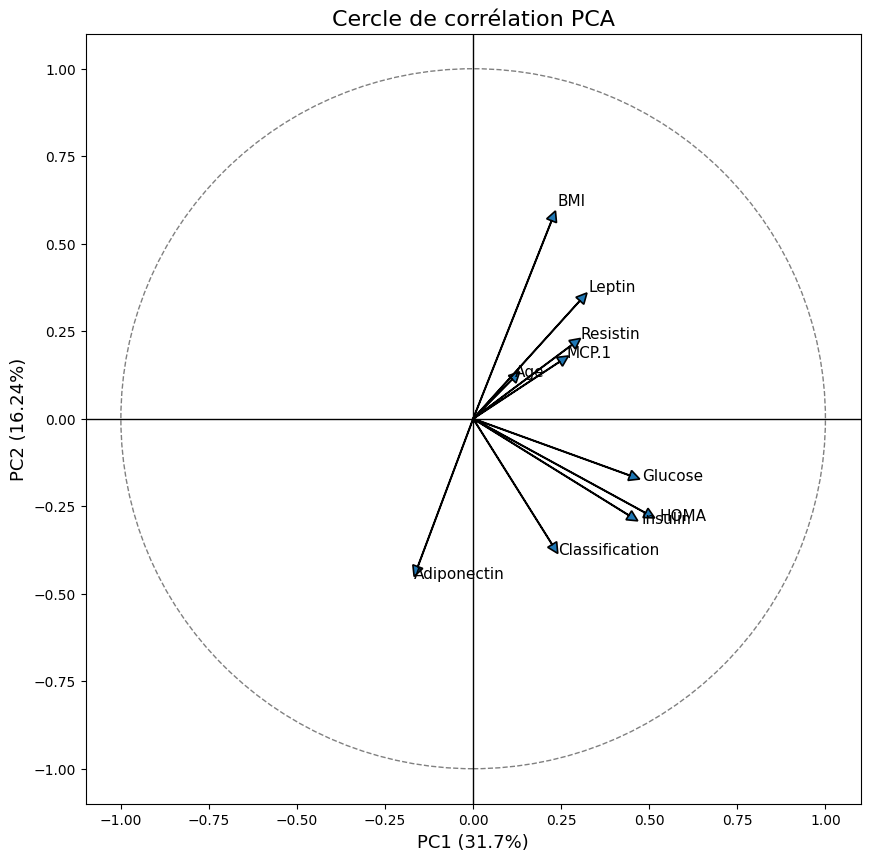

In [ ]:
# ---  cercle de corrélation ---
def plot_correlation_circle(pca, features, dim1=1, dim2=2):
    pcs = pca.components_
    pc1 = pcs[dim1-1]
    pc2 = pcs[dim2-1]

    fig, ax = plt.subplots(figsize=(10,10))

    # Cercle
    circle = plt.Circle((0,0), 1, color='grey', fill=False, linestyle='--')
    ax.add_artist(circle)

    # Axes
    ax.axhline(0, color='black', lw=1)
    ax.axvline(0, color='black', lw=1)

    # Variables
    for i, feature in enumerate(features):
        x = pc1[i]
        y = pc2[i]
        ax.arrow(0, 0, x, y, head_width=0.03, head_length=0.03, linewidth=1.2)
        ax.text(x*1.08, y*1.08, feature, fontsize=11)

    ax.set_xlabel(f"PC{dim1} ({round(pca.explained_variance_ratio_[dim1-1]*100,2)}%)", fontsize=13)
    ax.set_ylabel(f"PC{dim2} ({round(pca.explained_variance_ratio_[dim2-1]*100,2)}%)", fontsize=13)
    ax.set_title("Cercle de corrélation PCA", fontsize=16)
    ax.set_xlim(-1.1, 1.1)
    ax.set_ylim(-1.1, 1.1)
    plt.grid(False)
    plt.show()

# --- Appel de la fonction ---
plot_correlation_circle(pca, X.columns)


**Positive Correlations**: The inflammation/obesity markers (BMI, Leptin, Resistin, MCP.1) are highly inter-correlated. Similarly, the insulin resistance indicators (HOMA, Glucose, Classification) form a very tight, positively correlated group.

**Negative Correlation**: Adiponectin is strongly and negatively correlated with all other groups (BMI, Glucose, HOMA).

**Weak Variable**: Age is poorly represented on this plane, showing a weak correlation with the majority of the other variables.

#III. Data Preparation

##III.1. DSO1 : Predict the diagnosis type — M (Malignant) or B (Benign)

Now we are going to prepare the dataset

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [ ]:
df = df.drop('Unnamed: 32', axis=1)
df = df.drop('id', axis=1)

print("\nMissing values per column:")
print(df.isnull().sum())

duplicates = df.duplicated().sum()
print(f"\nDuplicate rows: {duplicates}")
if duplicates > 0:
    df = df.drop_duplicates()
    print(f"Removed {duplicates} duplicate rows")

print(f"\nFinal dataset shape after cleaning: {df.shape}")

In [ ]:
# Encode target variable
# M (Malignant) -> 1, B (Benign) -> 0
df['diagnosis'] = df['diagnosis'].map({'B': 0, 'M': 1})
df['diagnosis'].value_counts()

print(df['diagnosis'].value_counts())

# Separate features and target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y. shape}")

In [ ]:
# Apply StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for easier handling
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

print("\nFeature scaling completed using StandardScaler")
print(f"Scaled features shape: {X_scaled_df.shape}")
print("\nScaled data statistics:")
print(X_scaled_df.describe())

In [ ]:
# Apply PCA for visualization
pca_viz = PCA(n_components=2)
X_pca_2d = pca_viz.fit_transform(X_scaled)

# Visualization
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1],
                     c=y, cmap='viridis', alpha=0.6, edgecolors='k')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA: 2D Projection of Breast Cancer Data')
plt. colorbar(scatter, label='Diagnosis (0=Benign, 1=Malignant)')
plt.grid(True, alpha=0.3)
plt.show()

print(f"\nExplained variance by 2 components: {pca_viz. explained_variance_ratio_. sum():.2%}")

# Determine optimal number of components
pca_full = PCA(n_components=0.95)  # Retain 95% variance
X_pca = pca_full.fit_transform(X_scaled)

print(f"\nComponents needed for 95% variance: {pca_full.n_components_}")
print(f"Total explained variance: {pca_full. explained_variance_ratio_.sum():.2%}")

In [ ]:
from imblearn.over_sampling import SMOTE

# Check if SMOTE is needed
class_distribution = y.value_counts()
minority_ratio = class_distribution. min() / class_distribution.max()

print(f"\nClass imbalance ratio: {minority_ratio:.2f}")

if minority_ratio < 0.7:  # Apply SMOTE if minority class < 70%
    print("Applying SMOTE to balance classes...")
    smote = SMOTE(random_state=42)
    X_balanced, y_balanced = smote. fit_resample(X_scaled, y)

    print(f"Before SMOTE: {X_scaled.shape}")
    print(f"After SMOTE: {X_balanced. shape}")
    print(f"\nClass distribution after SMOTE:")
    print(pd.Series(y_balanced).value_counts())
else:
    print("Class distribution acceptable - SMOTE not applied")
    X_balanced, y_balanced = X_scaled, y

Balancing Train–Test Split (50% Benign / 50% Malignant)

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

# --- Original Split (keeps proportions but we will balance manually) ---
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.3,         # 70% train / 30% test
    random_state=42,
    stratify=y
)

# Convert to DataFrames for easy manipulation
train_df = pd.DataFrame(X_train, columns=X.columns)
train_df['diagnosis'] = y_train.values

test_df = pd.DataFrame(X_test, columns=X.columns)
test_df['diagnosis'] = y_test.values

# --- BALANCE THE TRAINING SET ---
train_min = train_df['diagnosis'].value_counts().min()

train_m = train_df[train_df['diagnosis'] == 1].sample(train_min, random_state=42)
train_b = train_df[train_df['diagnosis'] == 0].sample(train_min, random_state=42)
train_balanced = pd.concat([train_m, train_b]).sample(frac=1, random_state=42)

X_train_bal = train_balanced.drop('diagnosis', axis=1).values
y_train_bal = train_balanced['diagnosis'].values

# --- BALANCE THE TEST SET ---
test_min = test_df['diagnosis'].value_counts().min()

test_m = test_df[test_df['diagnosis'] == 1].sample(test_min, random_state=42)
test_b = test_df[test_df['diagnosis'] == 0].sample(test_min, random_state=42)
test_balanced = pd.concat([test_m, test_b]).sample(frac=1, random_state=42)

X_test_bal = test_balanced.drop('diagnosis', axis=1).values
y_test_bal = test_balanced['diagnosis'].values

# --- Check class balance ---
print("Balanced Training Set:")
print(pd.Series(y_train_bal).value_counts())

print("\nBalanced Test Set:")
print(pd.Series(y_test_bal).value_counts())

Because the original dataset is imbalanced (more Benign cases than Malignant), we applied a balancing strategy after splitting the data. The goal was to ensure that **both the training set (70%) and test set (30%) contain an equal number of Benign and Malignant samples**.

##III.2. Dataset 2 DSO2 + DSO3

## III.2.1 Data Transformation


In [ ]:
features2 = [col for col in df2.columns if col != "Classification"]
X = df2[features2].values
y = df2["Classification"].values


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler2 = StandardScaler()
X_scaled2 = scaler.fit_transform(X)



#IV. Modeling

##IV.1. DSO1 : Predict the diagnosis type — M (Malignant) or B (Benign)

###IV.1.1. Applying the XGboost (Extreme Gradient Boosting)


**XGBoost (Extreme Gradient Boosting)** is a fast and powerful machine learning algorithm based on **gradient-boosted decision trees**. It builds many trees sequentially, where each new tree corrects the errors of the previous ones.

**Architecture**

- Uses **boosting**: trees are added one after another.
- Each tree learns from the **residual errors** of the previous model.
- Includes **regularization** to reduce overfitting.
- Can handle missing values automatically.


**Key Parameters**

- **n_estimators** → number of trees.
- **max_depth** → how deep each tree can grow (model complexity).
- **learning_rate** → shrinkage applied to each tree’s contribution.
- **subsample** → % of rows used for each tree (prevents overfitting).
- **colsample_bytree** → % of features used per tree.
- **gamma** → minimum loss reduction needed to split a node.
- **min_child_weight** → minimum data needed in a leaf.



In [ ]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
xg=xgb.XGBClassifier()

In [ ]:
xg.fit(X_train_bal,y_train_bal)

In [ ]:
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False
)

param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 4, 5, 6, 8],
    'learning_rate': [0.001, 0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5, 10],
    'min_child_weight': [1, 2, 5, 10]
}

rnd_search_xgb = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=50,        # number of sampled combinations
    cv=5,
    scoring='roc_auc',
    verbose=2,
    n_jobs=-1,
    random_state=42
)

rnd_search_xgb.fit(X_train_bal, y_train_bal)
print("Best Params:", rnd_search_xgb.best_params_)
print(f"Best Cross-Validation Score: {rnd_search_xgb.best_score_:.4f}")

###IV.1.2. Applying Random Forest






**Random Forest** is an ensemble learning algorithm that builds many **independent decision trees** and combines their predictions.  


**Architecture**

- Builds **multiple decision trees** using different random subsets of the data and features.
- Each tree learns patterns independently.
- The final prediction is made by **majority vote** (classification).
- Randomness in sampling and feature selection makes the model more generalizable and stable.


**Key Parameters**

- **n_estimators** → number of trees in the forest.  
- **max_depth** → maximum depth of each tree (complexity control).  
- **min_samples_split** → minimum samples required to split a node.  
- **min_samples_leaf** → minimum samples required in a leaf node.  
- **max_features** → number of features considered when splitting a node.  
- **bootstrap** → whether trees are trained on bootstrapped samples.  


In [ ]:
# Defensive copies
X_model = X.copy()
y_model = y.copy()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
# Fit on training data only
rf.fit(X_train_bal, y_train_bal)

In [ ]:
from sklearn.tree import plot_tree
features = X.columns
estimator = rf.estimators_[5]
plt.figure(figsize=(24, 10))
plot_tree(
    estimator,
    feature_names=features,
    class_names=["Benign", "Malignant"],
    filled=True,
    rounded=True,
    max_depth=3,
    fontsize=10
)
plt.title("Visualisation d'un arbre du Random Forest (profondeur limitée à 3)")
plt.show()

###IV.1.3. Applying K-Nearest Neighbors (KNN)

**K-Nearest Neighbors (KNN)** is a simple and intuitive machine learning algorithm that makes predictions based on the **closest data points** in the feature space.

**Architecture**

- To classify a new point, KNN:
  1. Computes the **distance** to all training samples.
  2. Selects the **k nearest neighbors**.
  3. Predicts the class based on **majority vote** among these neighbors.
- Uses distance metrics like **Euclidean**, **Manhattan**, or **Minkowski**.



**Key Parameters**

- **n_neighbors (k)** → number of neighbors used for voting.  
- **weights** → `'uniform'` (equal vote) or `'distance'` (closer points have more influence).  
- **metric** → distance measure (`'euclidean'`).  
- **p** → power parameter for Minkowski distance (p=2 → Euclidean, p=1 → Manhattan).






In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
scores = []
for k in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_bal, y_train_bal)
    scores.append(knn.score(X_test_bal, y_test_bal))

best_k = scores.index(max(scores)) + 1
print("Meilleur k =", best_k)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd


knn = KNeighborsClassifier(n_neighbors=4, weights='distance')
knn.fit(X_train_bal, y_train_bal)

###IV.1.4. Applying Linear Regression

**Linear Regression** is a simple and widely used algorithm that models the relationship between input features and a target variable by fitting a **straight line ** to the data.  


**Architecture**

Linear Regression assumes the target value can be expressed as a **linear combination of the input features**:

\[
y = w1 x1 + w2 x2 + ... + wn xn + b
\]


Where:
- \( wi \) = weight (importance) of each feature  
- \( b \) = bias term  


The model learns these weights by minimizing the **Mean Squared Error (MSE)** between predicted and true values.


**Key Parameters**

- **fit_intercept** → whether the model should learn the bias term.  
- **normalize** → whether to normalize features before training (less used today).  
- **copy_X** → whether to copy the input data.  
- **n_jobs** → number of CPU cores used for computation.




In [ ]:
from sklearn.linear_model import LinearRegression

# Modèle
modelLR = LinearRegression()
modelLR.fit(X_train_bal, y_train_bal)


###IV.1.5. Applying Softmax regression


**Softmax Regression**  is a classification algorithm that extends logistic regression to handle multiple classes.  



**Architecture**

Softmax Regression computes a linear combination of the input features:

\[
z_k = w_{k1}x_1 + w_{k2}x_2 + \dots + w_{kn}x_n + b_k
\]

Then applies the **softmax function** to obtain class probabilities:

\[
P(y = k \mid x) = \frac{e^{z_k}}{\sum_{j=1}^{C} e^{z_j}}
\]

Where:  
- \( z_k \) = score for class \( k \)  
- \( C \) = number of classes  
- The output is a **probability for each class**, and the predicted class is the one with the highest probability.

For binary classification, Softmax Regression reduces to **Logistic Regression**.


**Key Parameters**

- **solver** → optimization algorithm (`lbfgs`, `saga`).  
- **max_iter** → maximum number of training iterations.  
- **C** → inverse of regularization strength (smaller C = stronger regularization).  
- **penalty** → type of regularization (`l2` is default).  
- **multi_class** → `'auto'`, `'multinomial'`, or `'ovr'`.



In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

pipeline = Pipeline([
    ('scaler', StandardScaler()),          # normalize all features
    ('pca', PCA(n_components=0.95,         # keep 95% variance → ~10 features
                random_state=42))
])
# fit PCA on TRAIN ONLY
X_train_ready = pipeline.fit_transform(X_train_bal)
X_test_ready  = pipeline.transform(X_test_bal)

print(f"Original features: {X_train_bal.shape[1]}")
print(f"After PCA       : {X_train_ready.shape[1]}")
print(f"Train shape     : {X_train_ready.shape}")
print(f"Test shape      : {X_test_ready.shape}")

In [ ]:
softmax_model = LogisticRegression(
    solver='lbfgs',
    max_iter=2000,
    multi_class='auto',
    random_state=42
)

softmax_model.fit(X_train_ready, y_train_bal)

###IV.1.6. Applying SVM (Support Vector Machine)

**Support Vector Machine (SVM)** is a powerful classification algorithm that finds the **best separating boundary (hyperplane)** between classes.  

**Architecture**

SVM tries to find a decision function of the form:

\[
f(x) = w \cdot x + b
\]

It chooses the hyperplane that **maximizes the margin** between classes:

- Points closest to the hyperplane are the **support vectors**.  
- A wider margin → better generalization.
- SVM can handle non-linear data using **kernels**, which map data to higher dimensions.

Common kernels:
- **linear**
- **rbf** (Gaussian)
- **poly**
- **sigmoid**


**Key Parameters**

- **C** → controls the trade-off between maximizing margin and minimizing classification errors  
  (small C = wider margin, large C = stricter classification)

- **kernel** → type of transformation applied to the data (`linear`, `rbf`, `poly`, `sigmoid`)

- **gamma** → controls how far the influence of a single training example reaches  
  (high gamma = more complex decision boundary)

- **degree** → degree of the polynomial kernel (used when `kernel='poly'`)


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

svm = SVC(kernel='linear', C=1)
svm.fit(X_train_bal, y_train_bal)


In [ ]:
svm_all_models = {}
kernels = ['linear', 'rbf', 'poly', 'sigmoid']

for k in kernels:
    model = SVC(kernel=k, C=1, gamma='scale')
    model.fit(X_train_bal, y_train_bal)
    svm_all_models[k] = model


Selecting top 10 most important features

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd

# Load Top 10 RF features
top_features = top10["feature"].tolist()
print("Top 10 features:", top_features)

# Rebuild DataFrames from balanced arrays
all_features = df.drop(columns=["diagnosis"]).columns

X_train_bal_df = pd.DataFrame(X_train_bal, columns=all_features)
X_test_bal_df  = pd.DataFrame(X_test_bal,  columns=all_features)

# select only your top 10 features
X_train_sel = X_train_bal_df[top_features]
X_test_sel  = X_test_bal_df[top_features]

#  Scale AFTER feature selection
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_sel)
X_test_scaled  = scaler.transform(X_test_sel)


# === 5. Entraînement SVM avec plusieurs kernels ===
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
svm_top10_models = {}

for k in kernels:
    model = SVC(kernel=k, C=1, gamma='scale')
    model.fit(X_train_scaled, y_train_bal)
    svm_top10_models[k] = model    # On stocke pour l'évaluation





###IV.1.7. Applying the MLP (Multilayer Perceptron)

A **Multilayer Perceptron (MLP)** is a type of **feedforward neural network** made of multiple layers of neurons.  


**Architecture**

An MLP consists of:

- **Input layer** → receives the features  
- **Hidden layers** → one or more layers of neurons with activation functions  
- **Output layer** → produces the final prediction


**Key Parameters**

- **hidden_layer_sizes** → number and size of hidden layers
- **activation** → function used in hidden layers (`relu`, `tanh`, `logistic`)  
- **solver** → optimization algorithm (`adam`, `sgd`, `lbfgs`)  
- **learning_rate** → controls how fast the model learns  
- **max_iter** → maximum training iterations  
- **alpha** → L2 regularization strength (prevents overfitting)  




In [ ]:
import tensorflow as tf
print(f"TensorFlow Version: {tf.__version__}")

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


mlp_paper = Sequential([
    Dense(500, activation='relu', input_shape=(X_train_bal.shape[1],)), # Use dynamic input_shape for robustness
    Dropout(0.5),                                       # 50% dropout
    Dense(500, activation='relu'),                      # Second layer
    Dropout(0.5),
    Dense(500, activation='relu'),                      # Third layer
    Dropout(0.5),
    Dense(1, activation='sigmoid')                     # Output
])

mlp_paper.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print("MLP arch (3×500 neurons + 50% dropout)")
print(mlp_paper.summary())

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)

print("Training  MLP... ")
history = mlp_paper.fit(
    X_train_bal, y_train_bal,
    validation_split=0.2,
    epochs=3000,
    batch_size=128,
    callbacks=[early_stop],
    verbose=1
)
print(f"Stopped at epoch {len(history.history['loss'])}")

###IV.1.8. Applying the GRU-SVM


**GRU-SVM** is a hybrid model that combines a **Gated Recurrent Unit (GRU)** neural network with a **Support Vector Machine (SVM)** classifier.  

**Architecture**

The GRU-SVM model works in two main steps:

**1. GRU Feature Extraction**

The GRU includes:
- **Update gate (z)** → controls how much of the past information to keep  
- **Reset gate (r)** → decides how much past information to forget  
- **Candidate state** → generates a new memory state  

This allows the model to capture complex dependencies in the data.

**2. SVM Classification**
The final GRU output is passed to an SVM classifier:

The SVM learns the decision boundary and performs the final classification (benign vs malignant).


**Key Parameters**

**GRU Parameters**
- **units** → number of GRU neurons  
- **dropout** → prevents overfitting  
- **learning_rate** → controls GRU training speed  
- **epochs** and **batch_size** → training configuration  

**SVM Parameters**
- **kernel** → usually `'rbf'` or `'linear'`  
- **C** → regularization strength  
- **gamma** → controls decision boundary flexibility  



              PCA-reduced features (10 dims)
                           │
                           ▼
        ┌──────────────────────────────────────┐
        │              GRU Layer               │
        │                                      │
        └──────────────────────────────────────┘
                           │
                128-dimensional embedding
                           │
                           ▼
        ┌──────────────────────────────────────┐
        │                  SVM                 │
        │     (linear classifier, C=5)         │
        └──────────────────────────────────────┘
                           │
                           ▼
                 Prediction: Benign / Malignant


In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
print(f"TensorFlow Version: {tf.__version__}")

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Exact hyperparams from the table
HYPERPARAMS = {
    'batch_size': 128,
    'gru_units': 128,
    'dropout_rate': 0.5,
    'epochs': 3000,
    'learning_rate': 1e-3,
    'svm_c': 5
}

| Hyperparameter           | Meaning                                     |  Explanation                                                    |
| ------------------------ | ------------------------------------------- | -------------------------------------------------------------------- |
| **batch_size = 128**     | Number of samples per gradient update       | Larger batch → more stable training                                  |
| **gru_units = 128**      | Number of hidden units in the GRU layer     | Controls model capacity (higher = more expressive)                   |
| **dropout_rate = 0.5**   | Fraction of neurons dropped during training | Prevents overfitting, adds regularization                            |
| **epochs = 3000**       | Maximum training iterations                 | Large value; rely on early stopping to avoid overfitting             |
| **learning_rate = 1e-3** | Step size for weight updates                | Standard LR for Adam, stable and effective                           |
| **svm_c = 5**            | Regularization strength for SVM classifier  | Higher C → stricter separation, less tolerance for misclassification |


**We will use as an input 10 features selected by PCA**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping



# 2. Prepare data for GRU
n_features = X_train_ready.shape[1]  # Number of PCA components

X_train_gru = X_train_ready.reshape(-1, n_features, 1)
X_test_gru = X_test_ready.reshape(-1, n_features, 1)

print(f"\nGRU Input Shapes:")
print(f"X_train_gru shape: {X_train_gru.shape}")
print(f"X_test_gru shape: {X_test_gru.shape}")

# 3. Build the GRU model
gru_extractor = Sequential([
    GRU(units=128, input_shape=(n_features, 1), return_sequences=False,
        kernel_regularizer='l2'),
    Dropout(0.5)
], name="GRU_Extractor")

# Add classifier head
gru_full = Sequential([
    gru_extractor,
    Dense(1, activation='sigmoid')
])

gru_full.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# 4. Train with early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=50,
                          restore_best_weights=True, verbose=1)

print("\nTraining GRU on PCA features...")
history = gru_full.fit(
    X_train_gru, y_train_bal,  # Use balanced labels
    validation_data=(X_test_gru, y_test_bal),
    epochs=3000,
    batch_size=128,
    callbacks=[early_stop],
    verbose=1
)
print("GRU training finished!")

In [ ]:
X_train_features = gru_extractor.predict(X_train_gru, verbose=0)
X_test_features  = gru_extractor.predict(X_test_gru,  verbose=0)

print(f"Features extracted successfully!")
print(f"Train features shape: {X_train_features.shape}")
print(f"Test  features shape: {X_test_features.shape}")

In [ ]:

# SVM
svm_gru = SVC(kernel='rbf', C=5.0, random_state=42)
svm_gru.fit(X_train_features, y_train_bal)


##IV.2. DSO2 : Cluster diagnosis patterns (types of cancers)

In [ ]:
# 1) Garder seulement les malades
df_cancer = df2[df2["Classification"] == 2].copy() #df2 contenant les malades seulement
df_non_cancer = df2[df2["Classification"] == 1].copy() #df2 contenant les non malades seulement
print(df_cancer.shape)  # nombre de patientes malades

(64, 10)


IV.2.1 : Model 1 (K-means)

In [ ]:


# 2) Features = toutes les colonnes explicatives SANS Classification
features2 = [col for col in df_cancer.columns if col != "Classification"]
X_cancer = df_cancer[features2].values


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler_cancer = StandardScaler()
X_cancer_scaled = scaler_cancer.fit_transform(X_cancer)


K=2: silhouette=0.231
K=3: silhouette=0.219
K=4: silhouette=0.209


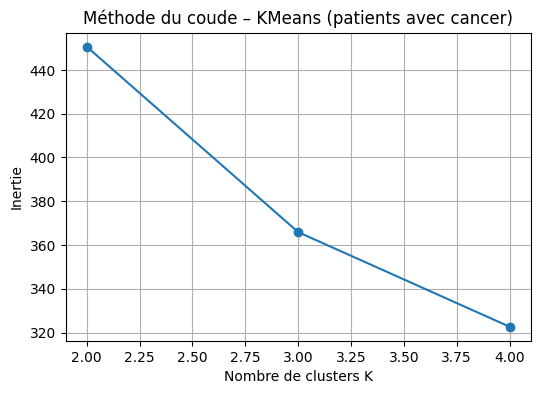

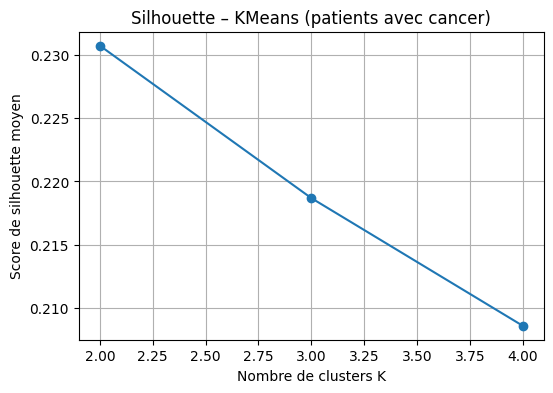

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

inertias = []
sil_scores = []
K_range = range(2, 5)  # K = 2, 3, 4 pour les sous-types de cancer

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_cancer_scaled)
    inertias.append(km.inertia_)
    labels = km.labels_
    sil = silhouette_score(X_cancer_scaled, labels)
    sil_scores.append(sil)
    print(f"K={k}: silhouette={sil:.3f}")

# Coude
plt.figure(figsize=(6,4))
plt.plot(K_range, inertias, marker='o')
plt.xlabel("Nombre de clusters K")
plt.ylabel("Inertie")
plt.title("Méthode du coude – KMeans (patients avec cancer)")
plt.grid(True)
plt.show()

# Silhouette
plt.figure(figsize=(6,4))
plt.plot(K_range, sil_scores, marker='o')
plt.xlabel("Nombre de clusters K")
plt.ylabel("Score de silhouette moyen")
plt.title("Silhouette – KMeans (patients avec cancer)")
plt.grid(True)
plt.show()


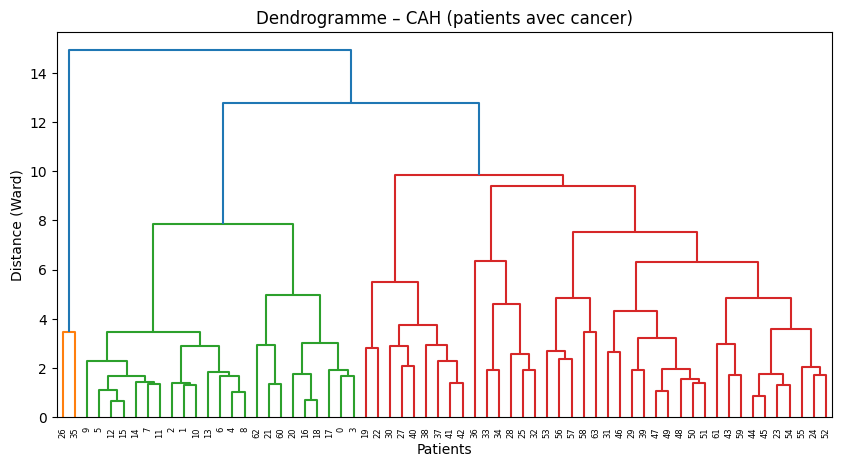

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Lien hiérarchique avec critère de Ward (adapté aux données continues standardisées)
Z = linkage(X_cancer_scaled, method='ward')

plt.figure(figsize=(10, 5))
dendrogram(Z, truncate_mode=None, color_threshold=None)
plt.title("Dendrogramme – CAH (patients avec cancer)")
plt.xlabel("Patients")
plt.ylabel("Distance (Ward)")
plt.show()


pour k=2

In [ ]:
best_k = 2

kmeans_cancer = KMeans(n_clusters=best_k, random_state=42, n_init=10)
kmeans_cancer.fit(X_cancer_scaled)

cluster_labels_cancer = kmeans_cancer.labels_

# Ajouter les labels de cluster dans df_cancer
df_cancer["cluster_kmeans_cancer"] = cluster_labels_cancer

# Si tu veux réintégrer dans le df complet (NaN pour les non malades)
df2["cluster_kmeans_cancer"] = np.nan
df2.loc[df_cancer.index, "cluster_kmeans_cancer"] = cluster_labels_cancer


In [ ]:
# Moyenne des variables par cluster
cluster_profile = df_cancer.groupby("cluster_kmeans_cancer")[features2].mean()
print(cluster_profile)

# Nombre de patientes par cluster
print(df_cancer["cluster_kmeans_cancer"].value_counts())


                             Age        BMI  Glucose    Insulin      HOMA  \
cluster_kmeans_cancer                                                       
0                      52.975000  24.661490   94.875   7.094225  1.668641   
1                      62.833333  30.856824  123.375  21.544875  6.881176   

                          Leptin  Adiponectin   Resistin      MCP.1  
cluster_kmeans_cancer                                                
0                      16.935700    10.423703  16.408309  494.80115  
1                      42.697867     9.456941  18.662891  676.70875  
cluster_kmeans_cancer
0    40
1    24
Name: count, dtype: int64


In [ ]:
from sklearn.decomposition import PCA

# Projection PCA 2D pour les patientes avec cancer
pca_vis = PCA(n_components=2)
X_cancer_pca = pca_vis.fit_transform(X_cancer_scaled)

# IMPORTANT : ajouter les colonnes dans df_cancer
df_cancer = df_cancer.copy()
df_cancer["PC1"] = X_cancer_pca[:, 0]
df_cancer["PC2"] = X_cancer_pca[:, 1]


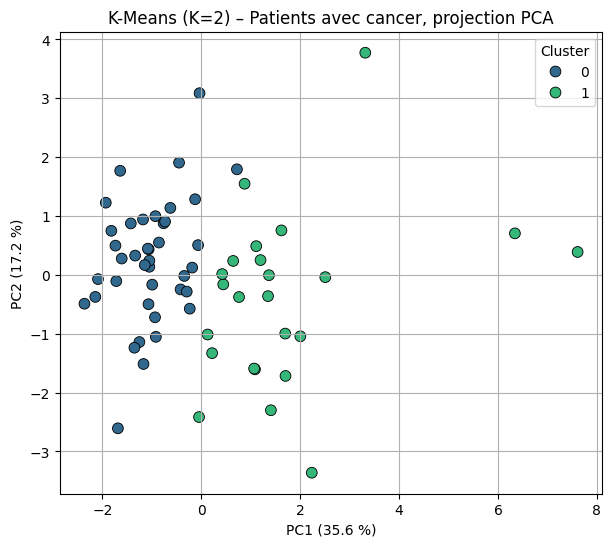

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 6))
sns.scatterplot(
    data=df_cancer,
    x="PC1", y="PC2",
    hue="cluster_kmeans_cancer",
    palette="viridis",
    s=60,
    edgecolor="k"
)
plt.xlabel(f"PC1 ({pca_vis.explained_variance_ratio_[0]*100:.1f} %)")
plt.ylabel(f"PC2 ({pca_vis.explained_variance_ratio_[1]*100:.1f} %)")
plt.title("K-Means (K=2) – Patients avec cancer, projection PCA")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()


Cluster 0:

Younger age, lower BMI, and significantly lower Glucose, Insulin, and HOMA than Cluster 1 $\rightarrow$ less disturbed metabolic profile.Leptin, Resistin, and MCP.1 are also lower, which is consistent with more moderate obesity/inflammation.A coherent name: "Cancers with Moderate Metabolic Risk" or "Moderate Metabolic Subtype."

Cluster 1:

Higher average age ($\approx 63$ years vs. $\approx 53$ years), significantly higher BMI ($\approx 31$), very high Glucose ($\approx 123$), and Insulin and HOMA multiplied by 3–4 $\rightarrow$ strong insulin resistance / metabolic syndrome.Leptin and MCP.1 are much higher, Resistin is also higher $\rightarrow$ profile of marked obesity and greater systemic inflammation.A coherent name: "Cancers with High Metabolic Risk (Obesity and Insulin Resistance)" or, shorter, "Severe Metabolic Subtype."

pour k=3

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# On part de df_cancer, features, X_cancer_scaled déjà définis
best_k = 3

kmeans_cancer_3 = KMeans(n_clusters=best_k, random_state=42, n_init=10)
kmeans_cancer_3.fit(X_cancer_scaled)

cluster_labels_cancer_3 = kmeans_cancer_3.labels_
df_cancer["cluster_kmeans_cancer_3"] = cluster_labels_cancer_3

# Qualité interne
sil_3 = silhouette_score(X_cancer_scaled, cluster_labels_cancer_3)
print("Silhouette K=3 (cancers) :", sil_3)


Silhouette K=3 (cancers) : 0.21868320395349716


In [ ]:
df_cancer.head(50)

Age        BMI  Glucose  Insulin       HOMA   Leptin  Adiponectin  \
52    45  21.303949      102   13.852   3.485163   7.6476    21.056625   
53    45  20.829995       74    4.560   0.832352   7.7529     8.237405   
54    49  20.956608       94   12.305   2.853119  11.2406     8.412175   
55    34  24.242424       92   21.699   4.924226  16.7353    21.823745   
56    42  21.359915       93    2.999   0.687971  19.0826     8.462915   
57    68  21.082813      102    6.200   1.559920   9.6994     8.574655   
58    51  19.132653       93    4.364   1.001102  11.0816     5.807620   
59    62  22.656250       92    3.482   0.790182   9.8648    11.236235   
60    38  22.499637       95    5.261   1.232828   8.4380     4.771920   
61    69  21.513859      112    6.683   1.846290  32.5800     4.138025   
62    49  21.367521       78    2.640   0.507936   6.3339     3.886145   
63    51  22.892820      103    2.740   0.696143   8.0163     9.349775   
64    59  22.832879       98    6.862   1.658774  14.9037     4.230105   
65    45  23.140496      116    4.902   1.402626  17.9973     4.294705   
66    54  24.218750       86    3.730   0.791257   8.6874     3.705230   
67    64  22.222222       98    5.700   1.377880  12.1905     4.783985   
68    46  20.830000       88    3.420   0.742368  12.8700    18.550000   
69    44  19.560000      114   15.890   4.468268  13.0800    20.370000   
70    45  20.260000       92    3.440   0.780651   7.6500    16.670000   
71    44  24.740000      106   58.460  15.285341  18.1600    16.100000   
72    51  18.370000      105    6.030   1.561770   9.6200    12.760000   
73    72  23.620000      105    4.420   1.144780  21.7800    17.860000   
74    46  22.210000       86   36.940   7.836205  10.1600     9.760000   
75    43  26.562500      101   10.555   2.629602   9.8000     6.420295   
76    55  31.975015       92   16.635   3.775036  37.2234    11.018455   
77    43  31.250000      103    4.328   1.099601  25.7816    12.718960   
78    86  26.666667      201   41.611  20.630734  47.6470     5.357135   
79    41  26.672763       97   22.033   5.271762  44.7059    13.494865   
80    59  28.672626       77    3.188   0.605507  17.0220    16.440480   
81    81  31.640368      100    9.669   2.385020  38.8066    10.636525   
82    48  32.461911       99   28.677   7.002923  46.0760    21.570000   
83    71  25.510204      112   10.395   2.871792  19.0653     5.486100   
84    42  29.296875       98    4.172   1.008511  12.2617     6.695585   
85    65  29.666548       85   14.649   3.071407  26.5166     7.282870   
86    48  28.125000       90    2.540   0.563880  15.5325    10.222310   
87    85  27.688778      196   51.814  25.050342  70.8824     7.901685   
88    48  31.250000      199   12.162   5.969920  18.1314     4.104105   
89    58  29.154519      139   16.582   5.685415  22.8884    10.262660   
90    40  30.836531      128   41.894  13.227332  31.0385     6.160995   
91    82  31.217482      100   18.077   4.458993  31.6453     9.923650   
92    52  30.801249       87   30.212   6.483495  29.2739     6.268540   
93    49  32.461911      134   24.887   8.225983  42.3914    10.793940   
94    60  31.231410      131   30.130   9.736007  37.8430     8.404430   
95    49  29.777778       70    8.396   1.449709  51.3387    10.731740   
96    44  27.887617       99    9.208   2.248594  12.6757     5.478170   
97    40  27.636054      103    2.432   0.617890  14.3224     6.783870   
98    71  27.915519      104   18.200   4.668907  53.4997     1.656020   
99    69  28.444444      108    8.808   2.346451  14.7485     5.288025   
100   74  28.650138       88    3.012   0.653805  31.1233     7.652220   
101   66  26.562500       89    6.524   1.432235  14.9084     8.429960   

     Resistin     MCP.1  Classification  cluster_kmeans_cancer       PC1  \
52   23.03408   552.444               2                      0 -1.050763   
53   28.03230   382.955               2                      0 -1.931268   
54

In [ ]:
# Nombre de patientes par cluster
print(df_cancer["cluster_kmeans_cancer_3"].value_counts())

# Moyenne des variables par cluster
cluster_profile_3 = df_cancer.groupby("cluster_kmeans_cancer_3")[features2].mean()
print(cluster_profile_3)


cluster_kmeans_cancer_3
0    39
1    22
2     3
Name: count, dtype: int64
                               Age        BMI     Glucose    Insulin  \
cluster_kmeans_cancer_3                                                
0                        53.076923  24.530303   95.512821   7.060846   
1                        60.818182  31.124368  110.681818  19.085727   
2                        73.000000  28.535148  198.666667  35.195667   

                              HOMA     Leptin  Adiponectin   Resistin  \
cluster_kmeans_cancer_3                                                 
0                         1.674255  16.053572    10.415805  16.296522   
1                         5.224861  42.701214    10.015245  15.248236   
2                        17.216999  45.553600     5.787642  44.405400   

                               MCP.1  
cluster_kmeans_cancer_3               
0                         492.040000  
1                         562.193500  
2                        1491.746333  


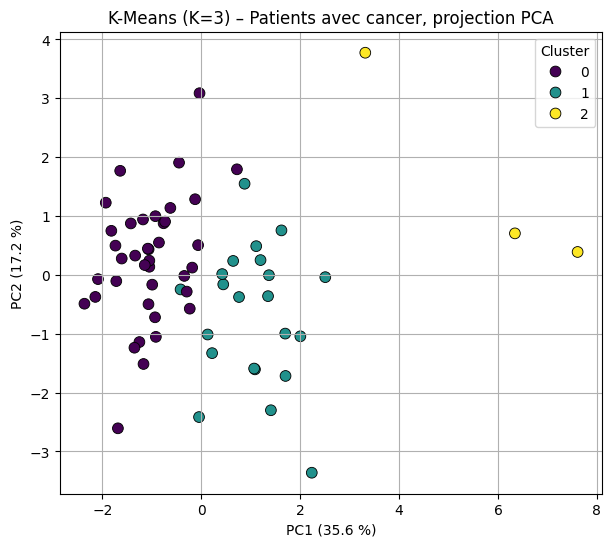

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

pca_vis_3 = PCA(n_components=2)
X_cancer_pca_3 = pca_vis_3.fit_transform(X_cancer_scaled)

df_cancer["PC1_3"] = X_cancer_pca_3[:, 0]
df_cancer["PC2_3"] = X_cancer_pca_3[:, 1]

plt.figure(figsize=(7, 6))
sns.scatterplot(
    data=df_cancer,
    x="PC1_3", y="PC2_3",
    hue="cluster_kmeans_cancer_3",
    palette="viridis",
    s=60,
    edgecolor="k"
)
plt.xlabel(f"PC1 ({pca_vis_3.explained_variance_ratio_[0]*100:.1f} %)")
plt.ylabel(f"PC2 ({pca_vis_3.explained_variance_ratio_[1]*100:.1f} %)")
plt.title("K-Means (K=3) – Patients avec cancer, projection PCA")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()


Cluster 0:

"Moderate Metabolic Cancers"
The least disturbed metabolic profile among the patients.

Cluster 1:

 "Intermediate Metabolic Risk Cancers"
Clear but not extreme metabolic anomalies, the central group.

Cluster 2:

"Severe Metabolic Cancers (Extreme Profiles)"
A few patients with very marked dysregulations, located at the extreme end of PC1.

IV.2.2 : Model 2 (Agglomerative)

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Modèle CAH avec k = 3
agg_cancer_3 = AgglomerativeClustering(
    n_clusters=3,
    linkage="ward"       # euclidean + Ward
)

labels_agg_3 = agg_cancer_3.fit_predict(X_cancer_scaled)

# Ajouter les labels dans df_cancer
df_cancer["cluster_agg_3"] = labels_agg_3

# (optionnel) remettre dans le df complet
df["cluster_agg_3"] = np.nan
df.loc[df_cancer.index, "cluster_agg_3"] = labels_agg_3

# Silhouette pour évaluer la qualité (facultatif mais utile pour comparaison avec KMeans)
sil_agg_3 = silhouette_score(X_cancer_scaled, labels_agg_3)
print("Silhouette CAH k= :", sil_agg_3)


Silhouette CAH k= : 0.16333552353660807


In [ ]:
df_cancer.head(50)

Age        BMI  Glucose  Insulin       HOMA   Leptin  Adiponectin  \
52    45  21.303949      102   13.852   3.485163   7.6476    21.056625   
53    45  20.829995       74    4.560   0.832352   7.7529     8.237405   
54    49  20.956608       94   12.305   2.853119  11.2406     8.412175   
55    34  24.242424       92   21.699   4.924226  16.7353    21.823745   
56    42  21.359915       93    2.999   0.687971  19.0826     8.462915   
57    68  21.082813      102    6.200   1.559920   9.6994     8.574655   
58    51  19.132653       93    4.364   1.001102  11.0816     5.807620   
59    62  22.656250       92    3.482   0.790182   9.8648    11.236235   
60    38  22.499637       95    5.261   1.232828   8.4380     4.771920   
61    69  21.513859      112    6.683   1.846290  32.5800     4.138025   
62    49  21.367521       78    2.640   0.507936   6.3339     3.886145   
63    51  22.892820      103    2.740   0.696143   8.0163     9.349775   
64    59  22.832879       98    6.862   1.658774  14.9037     4.230105   
65    45  23.140496      116    4.902   1.402626  17.9973     4.294705   
66    54  24.218750       86    3.730   0.791257   8.6874     3.705230   
67    64  22.222222       98    5.700   1.377880  12.1905     4.783985   
68    46  20.830000       88    3.420   0.742368  12.8700    18.550000   
69    44  19.560000      114   15.890   4.468268  13.0800    20.370000   
70    45  20.260000       92    3.440   0.780651   7.6500    16.670000   
71    44  24.740000      106   58.460  15.285341  18.1600    16.100000   
72    51  18.370000      105    6.030   1.561770   9.6200    12.760000   
73    72  23.620000      105    4.420   1.144780  21.7800    17.860000   
74    46  22.210000       86   36.940   7.836205  10.1600     9.760000   
75    43  26.562500      101   10.555   2.629602   9.8000     6.420295   
76    55  31.975015       92   16.635   3.775036  37.2234    11.018455   
77    43  31.250000      103    4.328   1.099601  25.7816    12.718960   
78    86  26.666667      201   41.611  20.630734  47.6470     5.357135   
79    41  26.672763       97   22.033   5.271762  44.7059    13.494865   
80    59  28.672626       77    3.188   0.605507  17.0220    16.440480   
81    81  31.640368      100    9.669   2.385020  38.8066    10.636525   
82    48  32.461911       99   28.677   7.002923  46.0760    21.570000   
83    71  25.510204      112   10.395   2.871792  19.0653     5.486100   
84    42  29.296875       98    4.172   1.008511  12.2617     6.695585   
85    65  29.666548       85   14.649   3.071407  26.5166     7.282870   
86    48  28.125000       90    2.540   0.563880  15.5325    10.222310   
87    85  27.688778      196   51.814  25.050342  70.8824     7.901685   
88    48  31.250000      199   12.162   5.969920  18.1314     4.104105   
89    58  29.154519      139   16.582   5.685415  22.8884    10.262660   
90    40  30.836531      128   41.894  13.227332  31.0385     6.160995   
91    82  31.217482      100   18.077   4.458993  31.6453     9.923650   
92    52  30.801249       87   30.212   6.483495  29.2739     6.268540   
93    49  32.461911      134   24.887   8.225983  42.3914    10.793940   
94    60  31.231410      131   30.130   9.736007  37.8430     8.404430   
95    49  29.777778       70    8.396   1.449709  51.3387    10.731740   
96    44  27.887617       99    9.208   2.248594  12.6757     5.478170   
97    40  27.636054      103    2.432   0.617890  14.3224     6.783870   
98    71  27.915519      104   18.200   4.668907  53.4997     1.656020   
99    69  28.444444      108    8.808   2.346451  14.7485     5.288025   
100   74  28.650138       88    3.012   0.653805  31.1233     7.652220   
101   66  26.562500       89    6.524   1.432235  14.9084     8.429960   

     Resistin     MCP.1  Classification  cluster_kmeans_cancer       PC1  \
52   23.03408   552.444               2                      0 -1.050763   
53   28.03230   382.955               2                      0 -1.931268   
54

In [ ]:
cluster_profile_agg_3 = df_cancer.groupby("cluster_agg_3")[features2].mean()
print(cluster_profile_agg_3)

print(df_cancer["cluster_agg_3"].value_counts())


                     Age        BMI     Glucose    Insulin       HOMA  \
cluster_agg_3                                                           
0              57.410256  29.880644  106.282051  14.330564   3.850754   
1              85.500000  27.177722  198.500000  46.712500  22.840538   
2              52.913043  22.057513   96.260870   6.457783   1.566669   

                 Leptin  Adiponectin   Resistin        MCP.1  
cluster_agg_3                                                 
0              32.79450     9.141144  19.044226   606.100231  
1              59.26470     6.629410  39.792700  1388.399500  
2              13.24617    11.919620  12.257892   418.189043  
cluster_agg_3
0    39
2    23
1     2
Name: count, dtype: int64


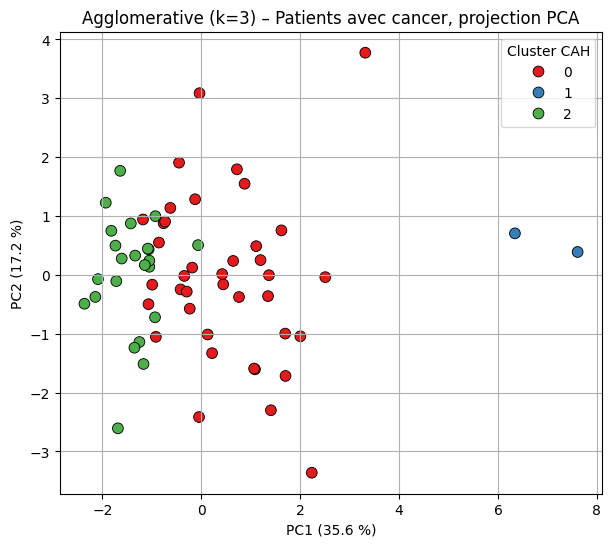

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# On part de X_cancer_scaled (patients avec cancer, standardisées)
pca_agg = PCA(n_components=2)
X_cancer_pca_agg = pca_agg.fit_transform(X_cancer_scaled)

# Ajouter les composantes au df_cancer
df_cancer["PC1_agg"] = X_cancer_pca_agg[:, 0]
df_cancer["PC2_agg"] = X_cancer_pca_agg[:, 1]

plt.figure(figsize=(7, 6))
sns.scatterplot(
    data=df_cancer,
    x="PC1_agg", y="PC2_agg",
    hue="cluster_agg_3",        # labels CAH (0 et 1)
    palette="Set1",
    s=60,
    edgecolor="k"
)
plt.xlabel(f"PC1 ({pca_agg.explained_variance_ratio_[0]*100:.1f} %)")
plt.ylabel(f"PC2 ({pca_agg.explained_variance_ratio_[1]*100:.1f} %)")
plt.title("Agglomerative (k=3) – Patients avec cancer, projection PCA")
plt.legend(title="Cluster CAH")
plt.grid(True)
plt.show()


IV.2.3 : Model 3 (Gaussian Mixture Model)

GMM k=2: silhouette=0.258
GMM k=3: silhouette=0.168
GMM k=4: silhouette=0.152


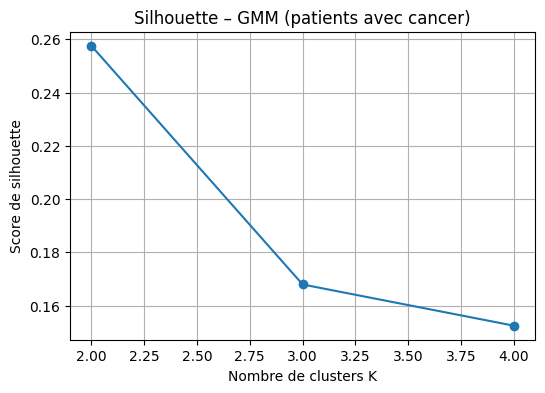

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Tester k = 2, 3, 4
K_range = range(2, 5)
sil_scores_gmm = []

for k in K_range:
    gmm = GaussianMixture(
        n_components=k,
        covariance_type="full",
        random_state=42
    )
    gmm.fit(X_cancer_scaled)

    labels = gmm.predict(X_cancer_scaled)
    sil = silhouette_score(X_cancer_scaled, labels)
    sil_scores_gmm.append(sil)

    print(f"GMM k={k}: silhouette={sil:.3f}")

# Graphique silhouette
plt.figure(figsize=(6, 4))
plt.plot(K_range, sil_scores_gmm, marker='o')
plt.xlabel("Nombre de clusters K")
plt.ylabel("Score de silhouette")
plt.title("Silhouette – GMM (patients avec cancer)")
plt.grid(True)
plt.show()


In [ ]:
import numpy as np

# Choisir le meilleur k
best_k_gmm = 3   # (ou le meilleur selon silhouette)

gmm_final = GaussianMixture(
    n_components=best_k_gmm,
    covariance_type="full",
    random_state=42
)
gmm_final.fit(X_cancer_scaled)

# Labels clusters
labels_gmm = gmm_final.predict(X_cancer_scaled)

# Ajouter au df_cancer
df_cancer["cluster_gmm"] = labels_gmm

# Intégrer dans df complet
df["cluster_gmm"] = np.nan
df.loc[df_cancer.index, "cluster_gmm"] = labels_gmm

# Qualité du clustering
sil_gmm = silhouette_score(X_cancer_scaled, labels_gmm)
print("Silhouette GMM :", sil_gmm)

# Nombre de patientes par cluster
print(df_cancer["cluster_gmm"].value_counts())

# Profil moyen des clusters
cluster_profile_gmm = df_cancer.groupby("cluster_gmm")[features2].mean()
print(cluster_profile_gmm)


Silhouette GMM : 0.16794200374270676
cluster_gmm
0    38
1    16
2    10
Name: count, dtype: int64
                   Age        BMI     Glucose    Insulin      HOMA     Leptin  \
cluster_gmm                                                                     
0            55.236842  26.287609   94.736842   7.391053  1.739184  21.215153   
1            63.625000  31.181117  136.812500  22.157187  7.840632  46.906756   
2            51.000000  22.919637   96.700000  16.547100  4.035479  14.549290   

             Adiponectin   Resistin       MCP.1  
cluster_gmm                                      
0               7.739978  18.645044  585.524711  
1               9.527198  19.263164  659.854625  
2              19.736037   8.751942  322.544300  


In [ ]:
df_cancer.head(50)

Age        BMI  Glucose  Insulin       HOMA   Leptin  Adiponectin  \
52    45  21.303949      102   13.852   3.485163   7.6476    21.056625   
53    45  20.829995       74    4.560   0.832352   7.7529     8.237405   
54    49  20.956608       94   12.305   2.853119  11.2406     8.412175   
55    34  24.242424       92   21.699   4.924226  16.7353    21.823745   
56    42  21.359915       93    2.999   0.687971  19.0826     8.462915   
57    68  21.082813      102    6.200   1.559920   9.6994     8.574655   
58    51  19.132653       93    4.364   1.001102  11.0816     5.807620   
59    62  22.656250       92    3.482   0.790182   9.8648    11.236235   
60    38  22.499637       95    5.261   1.232828   8.4380     4.771920   
61    69  21.513859      112    6.683   1.846290  32.5800     4.138025   
62    49  21.367521       78    2.640   0.507936   6.3339     3.886145   
63    51  22.892820      103    2.740   0.696143   8.0163     9.349775   
64    59  22.832879       98    6.862   1.658774  14.9037     4.230105   
65    45  23.140496      116    4.902   1.402626  17.9973     4.294705   
66    54  24.218750       86    3.730   0.791257   8.6874     3.705230   
67    64  22.222222       98    5.700   1.377880  12.1905     4.783985   
68    46  20.830000       88    3.420   0.742368  12.8700    18.550000   
69    44  19.560000      114   15.890   4.468268  13.0800    20.370000   
70    45  20.260000       92    3.440   0.780651   7.6500    16.670000   
71    44  24.740000      106   58.460  15.285341  18.1600    16.100000   
72    51  18.370000      105    6.030   1.561770   9.6200    12.760000   
73    72  23.620000      105    4.420   1.144780  21.7800    17.860000   
74    46  22.210000       86   36.940   7.836205  10.1600     9.760000   
75    43  26.562500      101   10.555   2.629602   9.8000     6.420295   
76    55  31.975015       92   16.635   3.775036  37.2234    11.018455   
77    43  31.250000      103    4.328   1.099601  25.7816    12.718960   
78    86  26.666667      201   41.611  20.630734  47.6470     5.357135   
79    41  26.672763       97   22.033   5.271762  44.7059    13.494865   
80    59  28.672626       77    3.188   0.605507  17.0220    16.440480   
81    81  31.640368      100    9.669   2.385020  38.8066    10.636525   
82    48  32.461911       99   28.677   7.002923  46.0760    21.570000   
83    71  25.510204      112   10.395   2.871792  19.0653     5.486100   
84    42  29.296875       98    4.172   1.008511  12.2617     6.695585   
85    65  29.666548       85   14.649   3.071407  26.5166     7.282870   
86    48  28.125000       90    2.540   0.563880  15.5325    10.222310   
87    85  27.688778      196   51.814  25.050342  70.8824     7.901685   
88    48  31.250000      199   12.162   5.969920  18.1314     4.104105   
89    58  29.154519      139   16.582   5.685415  22.8884    10.262660   
90    40  30.836531      128   41.894  13.227332  31.0385     6.160995   
91    82  31.217482      100   18.077   4.458993  31.6453     9.923650   
92    52  30.801249       87   30.212   6.483495  29.2739     6.268540   
93    49  32.461911      134   24.887   8.225983  42.3914    10.793940   
94    60  31.231410      131   30.130   9.736007  37.8430     8.404430   
95    49  29.777778       70    8.396   1.449709  51.3387    10.731740   
96    44  27.887617       99    9.208   2.248594  12.6757     5.478170   
97    40  27.636054      103    2.432   0.617890  14.3224     6.783870   
98    71  27.915519      104   18.200   4.668907  53.4997     1.656020   
99    69  28.444444      108    8.808   2.346451  14.7485     5.288025   
100   74  28.650138       88    3.012   0.653805  31.1233     7.652220   
101   66  26.562500       89    6.524   1.432235  14.9084     8.429960   

     Resistin     MCP.1  Classification  cluster_kmeans_cancer       PC1  \
52   23.03408   552.444               2                      0 -1.050763   
53   28.03230   382.955               2                      0 -1.931268   
54

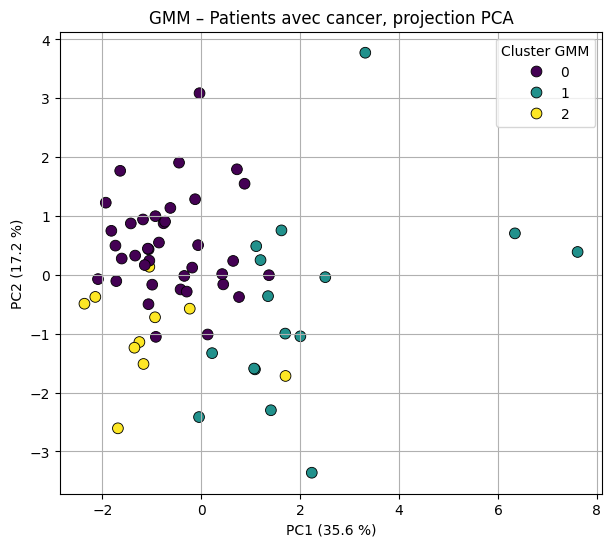

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# PCA 2D
pca_gmm = PCA(n_components=2)
X_cancer_pca_gmm = pca_gmm.fit_transform(X_cancer_scaled)

df_cancer["PC1_gmm"] = X_cancer_pca_gmm[:, 0]
df_cancer["PC2_gmm"] = X_cancer_pca_gmm[:, 1]

# Scatterplot
plt.figure(figsize=(7, 6))
sns.scatterplot(
    data=df_cancer,
    x="PC1_gmm",
    y="PC2_gmm",
    hue="cluster_gmm",
    palette="viridis",
    s=60,
    edgecolor="k"
)
plt.xlabel(f"PC1 ({pca_gmm.explained_variance_ratio_[0]*100:.1f} %)")
plt.ylabel(f"PC2 ({pca_gmm.explained_variance_ratio_[1]*100:.1f} %)")
plt.title("GMM – Patients avec cancer, projection PCA")
plt.legend(title="Cluster GMM")
plt.grid(True)
plt.show()


In [ ]:
cols_to_drop = ["PC1", "PC2", "PC1_3", "PC2_3", "PC1_agg", "PC2_agg", "PC1_gmm","PC2_gmm"]
df_cancer = df_cancer.drop(columns=cols_to_drop, errors="ignore")


In [ ]:
df_cancer.head()

Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  \
52   45  21.303949      102   13.852  3.485163   7.6476    21.056625   
53   45  20.829995       74    4.560  0.832352   7.7529     8.237405   
54   49  20.956608       94   12.305  2.853119  11.2406     8.412175   
55   34  24.242424       92   21.699  4.924226  16.7353    21.823745   
56   42  21.359915       93    2.999  0.687971  19.0826     8.462915   

    Resistin    MCP.1  Classification  cluster_kmeans_cancer  \
52  23.03408  552.444               2                      0   
53  28.03230  382.955               2                      0   
54  23.11770  573.630               2                      0   
55  12.06534  481.949               2                      0   
56  17.37615  321.919               2                      0   

    cluster_kmeans_cancer_3  cluster_agg_3  cluster_gmm  
52                        0              2            2  
53                        0              2            0  
54                        0              2            0  
55                        0              2            2  
56                        0              2            0

In [ ]:
#attribuer le cluster au non malade
df_non_cancer["cluster_kmeans_cancer"] = 3
df_non_cancer["cluster_kmeans_cancer_3"] = 3
df_non_cancer["cluster_agg_3"] = 3
df_non_cancer["cluster_gmm"] = 3

In [ ]:
df_non_cancer.head()

Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  Resistin  \
0   48  23.500000       70    2.707  0.467409   8.8071     9.702400   7.99585   
1   83  20.690495       92    3.115  0.706897   8.8438     5.429285   4.06405   
2   82  23.124670       91    4.498  1.009651  17.9393    22.432040   9.27715   
3   68  21.367521       77    3.226  0.612725   9.8827     7.169560  12.76600   
4   86  21.111111       92    3.549  0.805386   6.6994     4.819240  10.57635   

     MCP.1  Classification  cluster_kmeans_cancer  cluster_kmeans_cancer_3  \
0  417.114               1                      3                        3   
1  468.786               1                      3                        3   
2  554.697               1                      3                        3   
3  928.220               1                      3                        3   
4  773.920               1                      3                        3   

   cluster_agg_3  cluster_gmm  
0              3            3  
1              3            3  
2              3            3  
3              3            3  
4              3            3

In [ ]:
#fusionner les dfs
df_complet = pd.concat([df_cancer, df_non_cancer], axis=0)
df_complet = df_complet.sort_index()


In [ ]:
print(df_complet["cluster_kmeans_cancer"].value_counts())
print(df_complet["cluster_kmeans_cancer_3"].value_counts())
print(df_complet["cluster_agg_3"].value_counts())
print(df_complet["cluster_gmm"].value_counts())


cluster_kmeans_cancer
3    52
0    40
1    24
Name: count, dtype: int64
cluster_kmeans_cancer_3
3    52
0    39
1    22
2     3
Name: count, dtype: int64
cluster_agg_3
3    52
0    39
2    23
1     2
Name: count, dtype: int64
cluster_gmm
3    52
0    38
1    16
2    10
Name: count, dtype: int64


##IV.3. DSO3 : Implementing a recommendation system for patient's clusters

#V. Evaluation

##V.1. DSO1 : Predict the diagnosis type — M (Malignant) or B (Benign)

xgboost

In [ ]:
y_pred_xg=xg.predict(X_test_bal)

In [ ]:
print("Accuracy:", accuracy_score(y_test_bal, y_pred_xg))

random forest

In [ ]:
y_pred = rf.predict(X_test_bal)
print("=== Classification Report ===")
print(classification_report(y_test_bal, y_pred))
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test_bal, y_pred))

In [ ]:
# 3. Evaluation on the test set
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test_bal, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

In [ ]:
cv_mean = cross_val_score(rf, X_scaled, y_model, cv=5).mean()
print(f"Mean Cross-Validation Accuracy (5-fold): {cv_mean:.4f}")

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Probabilités pour la classe 1 (Malignant)
y_test_proba = rf.predict_proba(X_test_bal)[:, 1]

# Courbe ROC
fpr, tpr, thresholds = roc_curve(y_test_bal, y_test_proba)
auc_rf = roc_auc_score(y_test_bal, y_test_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Random Forest ROC (AUC = {auc_rf:.3f})", color="darkred", linewidth=2)
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")

plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Courbe ROC – Random Forest (Test set)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

knn

In [ ]:
y_pred = knn.predict(X_test_bal)
print("Accuracy:", accuracy_score(y_test_bal, y_pred))
print("\nClassification Report:\n", classification_report(y_test_bal, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_bal, y_pred))

linear regression

In [ ]:
# Prédiction

y_pred_continuous = modelLR.predict(X_test_bal)
y_pred = (y_pred_continuous >= 0.5).astype(int)

# Évaluation
acc = accuracy_score(y_test_bal, y_pred)
print("Accuracy régression linéaire :", acc)
print("\nRapport de classification :\n", classification_report(y_test_bal, y_pred))
print("\nMatrice de confusion :\n", confusion_matrix(y_test_bal, y_pred))

softmax regression

In [ ]:
y_pred = softmax_model.predict(X_test_ready)

accuracy = accuracy_score(y_test_bal, y_pred)
print(f"\nSoftmax Regression Accuracy: {accuracy:.4f} → {accuracy*100:.2f}%\n")

print("Classification Report:")
print(classification_report(y_test_bal, y_pred))

# confusion matrix
cm = confusion_matrix(y_test_bal, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'])
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.title(f"Softmax Regression – {accuracy*100:.2f}% Accuracy")
plt.show()

svm

*the whole features

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("\n=== Evaluation : SVM avec TOUTES les features ===")
for k, model in svm_all_models.items():
    y_pred = model.predict(X_test_bal)
    print(f"{k} → Accuracy = {accuracy_score(y_test_bal, y_pred):.4f}")




In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Prédiction avec le meilleur modèle SVM (ici RBF)
best_model_all = svm_all_models['rbf']
y_pred_all = best_model_all.predict(X_test_bal)

# Calcul de la confusion matrix et de l'accuracy
cm = confusion_matrix(y_test_bal, y_pred_all)
accuracy = accuracy_score(y_test_bal, y_pred_all)

# Graphique de la confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'])
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.title(f"SVM RBF – {accuracy*100:.2f}% Accuracy")
plt.show()

# Rapport de classification détaillé
print("\n=== Détails du SVM (kernel RBF) ===")
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test_bal, y_pred_all))


*10 features

In [ ]:
print("\n=== Evaluation : SVM avec TOP 10 features ===")
for k, model in svm_top10_models.items():
    y_pred_k = model.predict(X_test_scaled)
    acc = accuracy_score(y_test_bal, y_pred_k)
    print(f"{k} → Accuracy = {acc:.4f}")

In [ ]:


# Prédiction avec le meilleur modèle SVM (Top10 features, kernel Linear)
best_model_top10 = svm_top10_models['linear']
y_pred_top10 = best_model_top10.predict(X_test_scaled)

# Calcul de la confusion matrix et de l'accuracy
cm_top10 = confusion_matrix(y_test_bal, y_pred_top10)
accuracy_top10 = accuracy_score(y_test_bal, y_pred_top10)

# Graphique de la confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm_top10, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'])
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.title(f"SVM Top10 RBF – {accuracy_top10*100:.2f}% Accuracy")
plt.show()

# Rapport de classification détaillé
print("\n=== Détails du SVM (Top10 features, kernel RBF) ===")
print("Accuracy:", accuracy_top10)
print("\nConfusion Matrix:\n", cm_top10)
print("\nClassification Report:\n", classification_report(y_test_bal, y_pred_top10))


*courbe ROC SVM

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# --- SVM avec toutes les features ---
best_model_all = svm_all_models['rbf']
# Decision scores pour la classe 1
y_scores_all = best_model_all.decision_function(X_test_bal)
fpr_all, tpr_all, _ = roc_curve(y_test_bal, y_scores_all)
auc_all = roc_auc_score(y_test_bal, y_scores_all)

# --- SVM avec Top10 features ---
best_model_top10 = svm_top10_models['rbf']
y_scores_top10 = best_model_top10.decision_function(X_test_scaled)
fpr_top10, tpr_top10, _ = roc_curve(y_test_bal, y_scores_top10)
auc_top10 = roc_auc_score(y_test_bal, y_scores_top10)

# --- Plot ROC curves ---
plt.figure(figsize=(8, 6))
plt.plot(fpr_all, tpr_all, label=f"SVM All Features (AUC = {auc_all:.3f})", color="blue", linewidth=2)
plt.plot(fpr_top10, tpr_top10, label=f"SVM Top10 Features (AUC = {auc_top10:.3f})", color="green", linewidth=2)
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Diagonale

plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Courbe ROC – SVM RBF (Test set)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


mlp

In [ ]:
y_pred_prob = mlp_paper.predict(X_test_bal)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

acc = accuracy_score(y_test_bal, y_pred) # Changed y_test to y_test_mlp
print(f"\nMLP Test Accuracy: {acc:.4f} → {acc*100:.3f}%")

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test_bal, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'])
plt.title(f'MLP {acc*100:.3f}% Accuracy', fontweight='bold')
plt.show()



In [ ]:
# ROC Curve
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt

# Get probability scores from the MLP
y_prob_mlp = mlp_paper.predict(X_test_bal).flatten()

fpr, tpr, thresholds = roc_curve(y_test_bal, y_prob_mlp)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8.5, 7.5))
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                estimator_name='MLP ').plot(ax=plt.gca(), lw=3.5, color='#e74c3c')

plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random classifier (AUC = 0.50)')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.02])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=14)
plt.title('ROC Curve – MLP (3×500 neurons, raw features)\nAUC = {:.4f}'.format(roc_auc),
          fontsize=16, fontweight='bold', pad=25, color='#2c3e50')
plt.legend(loc="lower right", fontsize=13)
plt.grid(True, alpha=0.3)
plt.fill_between(fpr, tpr, alpha=0.15, color='#e74c3c')
plt.show()

print(f"MLP  AUC = {roc_auc:.4f}")

gru-svm

In [ ]:
y_pred = svm_gru.predict(X_test_features)
acc = accuracy_score(y_test_bal, y_pred)

print(f"\nGRU-SVM FINAL RESULT")
print(f"Test Accuracy : {acc:.4f} → {acc*100:.2f}%")

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test_bal, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'])
plt.title(f'GRU-SVM – {acc*100:.2f}% Accuracy)')
plt.ylabel('True'), plt.xlabel('Predicted')
plt.show()

In [ ]:
# ROC Curve GRU-SVM (with PCA features)
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt

y_score = svm_gru.decision_function(X_test_features)

fpr, tpr, thresholds = roc_curve(y_test_bal, y_score)
roc_auc = auc(fpr, tpr)

# Plot – publication quality
plt.figure(figsize=(8.5, 7.5))
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                estimator_name='GRU-SVM (with PCA)').plot(ax=plt.gca(), lw=3, color='#8e44ad')

plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random classifier')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.02])
plt.xlabel('False Positive Rate (1 − Specificity)', fontsize=14)
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=14)
plt.title('ROC Curve – GRU-SVM\nAUC = {:.4f}'.format(roc_auc), fontsize=16, fontweight='bold', pad=20)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True, alpha=0.3)
plt.fill_between(fpr, tpr, alpha=0.15, color='#9b59b6')
plt.show()

print(f"GRU-SVM AUC on test set = {roc_auc:.4f}")

Comparaison of all models with Roc curve


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


# 1. COLLECT MODEL PROBABILITY SCORES

# XGBoost (tuned)
xgb_best = rnd_search_xgb.best_estimator_
y_prob_xgb = xgb_best.predict_proba(X_test_bal)[:, 1]

# Balanced Random Forest
y_prob_rf = rf.predict_proba(X_test_bal)[:, 1]

# KNN k = 4
y_prob_knn = knn.predict_proba(X_test_bal)[:, 1]

# Linear Regression
y_prob_lr = modelLR.predict(X_test_bal)

# Softmax Regression (Logistic Regression + PCA)
y_prob_soft = softmax_model.predict_proba(X_test_ready)[:, 1]

# SVM RBF (probability enabled)
svm_rbf = SVC(kernel='rbf', C=1, probability=True)
svm_rbf.fit(X_train_scaled, y_train_bal)
y_prob_svm = svm_rbf.predict_proba(X_test_scaled)[:, 1]

# MLP
y_prob_mlp = mlp_paper.predict(X_test_bal).flatten()

# GRU-SVM
svm_gru = SVC(kernel='rbf', C=5.0, probability=True)
svm_gru.fit(X_train_features, y_train_bal)
y_prob_gru = svm_gru.predict_proba(X_test_features)[:, 1]


# 2. DICTIONARY OF ALL MODELS FOR LOOPING

roc_models = {
    "XGBoost": y_prob_xgb,
    "Random Forest": y_prob_rf,
    "KNN (k=4)": y_prob_knn,
    "Linear Regression": y_prob_lr,
    "Softmax Regression": y_prob_soft,
    "SVM RBF": y_prob_svm,
    "MLP": y_prob_mlp,
    "GRU-SVM": y_prob_gru
}


# 3. FINAL CLEAN ROC CURVE (LIKE YOUR GOOD EXAMPLE)

plt.figure(figsize=(10, 8), dpi=120)

# Soft clean background
plt.gca().set_facecolor('#f7f0fa')  # pale lavender style

# Plot ROC curves
for name, y_prob in roc_models.items():
    fpr, tpr, _ = roc_curve(y_test_bal, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(
        fpr, tpr,
        linewidth=2.3,
        label=f"{name} (AUC={roc_auc:.3f})"
    )

# Random baseline
plt.plot([0, 1], [0, 1], "--", color="black", linewidth=1)

# Labels and title
plt.xlabel("False Positive Rate", fontsize=14)
plt.ylabel("True Positive Rate (Sensitivity)", fontsize=14)
plt.title("ROC Curve Comparison — All Models", fontsize=16, fontweight="bold")

# Legend clean + readable
plt.legend(
    loc="lower right",
    fontsize=11,
    frameon=True,
    facecolor="white",
    edgecolor="black"
)

# Full (no zoom)
plt.xlim(0, 1)
plt.ylim(0, 1)

plt.grid(False)
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix


# DICTIONARY TO STORE RESULTS

results = {}
conf_matrices = {}

# XGBOOST

xgb_best = rnd_search_xgb.best_estimator_
y_prob_xgb = xgb_best.predict_proba(X_test_bal)[:, 1]
y_pred_xgb = (y_prob_xgb >= 0.5).astype(int)

results["XGBoost"] = [
    accuracy_score(y_test_bal, y_pred_xgb),
    precision_score(y_test_bal, y_pred_xgb),
    recall_score(y_test_bal, y_pred_xgb),
    f1_score(y_test_bal, y_pred_xgb),
    roc_auc_score(y_test_bal, y_prob_xgb)
]

conf_matrices["XGBoost"] = confusion_matrix(y_test_bal, y_pred_xgb)

# BALANCED RANDOM FOREST

y_prob_rf = rf.predict_proba(X_test_bal)[:, 1]
y_pred_rf = rf.predict(X_test_bal)

results["Random forest"] = [
    accuracy_score(y_test_bal, y_pred_rf),
    precision_score(y_test_bal, y_pred_rf),
    recall_score(y_test_bal, y_pred_rf),
    f1_score(y_test_bal, y_pred_rf),
    roc_auc_score(y_test_bal, y_prob_rf)
]

conf_matrices["Random forest"] = confusion_matrix(y_test_bal, y_pred_rf)


# KNN (k=4)

y_prob_knn = knn.predict_proba(X_test_bal)[:, 1]
y_pred_knn = knn.predict(X_test_bal)

results["KNN (k=4)"] = [
    accuracy_score(y_test_bal, y_pred_knn),
    precision_score(y_test_bal, y_pred_knn),
    recall_score(y_test_bal, y_pred_knn),
    f1_score(y_test_bal, y_pred_knn),
    roc_auc_score(y_test_bal, y_prob_knn)
]

conf_matrices["KNN (k=4)"] = confusion_matrix(y_test_bal, y_pred_knn)


# LINEAR REGRESSION

y_prob_lr = modelLR.predict(X_test_bal)
y_pred_lr = (y_prob_lr >= 0.5).astype(int)

results["Linear Regression"] = [
    accuracy_score(y_test_bal, y_pred_lr),
    precision_score(y_test_bal, y_pred_lr),
    recall_score(y_test_bal, y_pred_lr),
    f1_score(y_test_bal, y_pred_lr),
    roc_auc_score(y_test_bal, y_prob_lr)
]

conf_matrices["Linear Regression"] = confusion_matrix(y_test_bal, y_pred_lr)


# SOFTMAX REGRESSION (LOGISTIC WITH PCA)

y_prob_soft = softmax_model.predict_proba(X_test_ready)[:, 1]
y_pred_soft = (y_prob_soft >= 0.5).astype(int)

results["Softmax Regression"] = [
    accuracy_score(y_test_bal, y_pred_soft),
    precision_score(y_test_bal, y_pred_soft),
    recall_score(y_test_bal, y_pred_soft),
    f1_score(y_test_bal, y_pred_soft),
    roc_auc_score(y_test_bal, y_prob_soft)
]

conf_matrices["Softmax Regression"] = confusion_matrix(y_test_bal, y_pred_soft)


# SVM (RBF)

svm_rbf = SVC(kernel='rbf', C=1, probability=True)
svm_rbf.fit(X_train_scaled, y_train_bal)

y_prob_svm = svm_rbf.predict_proba(X_test_scaled)[:, 1]
y_pred_svm = svm_rbf.predict(X_test_scaled)

results["SVM (RBF)"] = [
    accuracy_score(y_test_bal, y_pred_svm),
    precision_score(y_test_bal, y_pred_svm),
    recall_score(y_test_bal, y_pred_svm),
    f1_score(y_test_bal, y_pred_svm),
    roc_auc_score(y_test_bal, y_prob_svm)
]

conf_matrices["SVM (RBF)"] = confusion_matrix(y_test_bal, y_pred_svm)


# MLP

y_prob_mlp = mlp_paper.predict(X_test_bal).flatten()
y_pred_mlp = (y_prob_mlp >= 0.5).astype(int)

results["MLP"] = [
    accuracy_score(y_test_bal, y_pred_mlp),
    precision_score(y_test_bal, y_pred_mlp),
    recall_score(y_test_bal, y_pred_mlp),
    f1_score(y_test_bal, y_pred_mlp),
    roc_auc_score(y_test_bal, y_prob_mlp)
]

conf_matrices["MLP"] = confusion_matrix(y_test_bal, y_pred_mlp)


# GRU-SVM

svm_gru = SVC(kernel='rbf', C=5.0, probability=True)
svm_gru.fit(X_train_features, y_train_bal)

y_prob_gru = svm_gru.predict_proba(X_test_features)[:, 1]
y_pred_gru = svm_gru.predict(X_test_features)

results["GRU-SVM"] = [
    accuracy_score(y_test_bal, y_pred_gru),
    precision_score(y_test_bal, y_pred_gru),
    recall_score(y_test_bal, y_pred_gru),
    f1_score(y_test_bal, y_pred_gru),
    roc_auc_score(y_test_bal, y_prob_gru)
]

conf_matrices["GRU-SVM"] = confusion_matrix(y_test_bal, y_pred_gru)


# FINAL COMPARISON TABLE

df_results = pd.DataFrame(results, index=["Accuracy", "Precision", "Recall", "F1-score", "AUC"]).T
print("\n=== FINAL MODEL COMPARISON TABLE ===\n")
print(df_results)


# SHOW CONFUSION MATRICES

print("\n=== CONFUSION MATRICES ===\n")
for model_name, cm in conf_matrices.items():
    print(f"\n{model_name}:\n{cm}\n")


##V.2. DSO2 : Cluster diagnosis patterns (types of cancers)

In [ ]:
from sklearn.metrics import (
    silhouette_score, davies_bouldin_score, calinski_harabasz_score,
    adjusted_rand_score, normalized_mutual_info_score,
    homogeneity_score, completeness_score, v_measure_score
)

def evaluate_clustering(X, labels):
    results = {}

    # Internal metrics
    results["silhouette"] = silhouette_score(X, labels)
    results["davies_bouldin"] = davies_bouldin_score(X, labels)
    results["calinski_harabasz"] = calinski_harabasz_score(X, labels)


    return results


In [ ]:
results_kmeans_3 = evaluate_clustering(
    X_cancer_scaled,
    df_cancer["cluster_kmeans_cancer_3"]
)
print("Évaluation KMeans k=3 :")
print(results_kmeans_3)


Évaluation KMeans k=3 :
{'silhouette': np.float64(0.21868320395349716), 'davies_bouldin': np.float64(1.536041600853445), 'calinski_harabasz': np.float64(17.5139969952865)}


In [ ]:
results_agg = evaluate_clustering(
    X_cancer_scaled,
    df_cancer["cluster_agg_3"]
)
print("Évaluation Agglomératif :")
print(results_agg)


Évaluation Agglomératif :
{'silhouette': np.float64(0.16333552353660807), 'davies_bouldin': np.float64(1.4241494410103923), 'calinski_harabasz': np.float64(15.335836102104611)}


In [ ]:
results_gmm = evaluate_clustering(
    X_cancer_scaled,
    df_cancer["cluster_gmm"]
)
print("Évaluation GMM :")
print(results_gmm)


Évaluation GMM :
{'silhouette': np.float64(0.16794200374270676), 'davies_bouldin': np.float64(1.6872830445113796), 'calinski_harabasz': np.float64(12.035539400172546)}


#VI. Deployment